<p>
<span style="font-family:'Times New Roman'; font-size:16pt">
<b>FINAL PROJECT - RAKAMIN DATA SCIENCE BOOTCAMP</b>
</span><br>
<i>Dataset Source: <a href="https://www.kaggle.com/patelprashant/employee-attrition">Employee Attrition - Fictional dataset on HR Employee attrition and performance</a><i>
</p>

# Introduction

<p>
<b>Team 1 (Pythagoras)</b><br>
<ul>
    <li>Anoga Rizky Novaldi</li>
    <li>Cut Hasna Aushaf</li>
    <li>Danienta Aqmarrazza</li>
    <li>Esa Tauran</li>
    <li>Faisal Adam Yudithia</li>
    <li>Jehezkiel Natan Krispratomo</li>
</ul>
</p>

**Role**

Kami bagian dari HR Consultant yang bertanggung jawab untuk menyelesaikan permasalahan Sumber Daya Manusia (SDM) di salah satu perusahaan klien kami, yaitu PT Goras. PT Goras adalah sebuah perusahaan yang bergerak di industri farmasi, di Indonesia.

**Problem Statement**

Setiap perusahaan akan selalu memaksimalkan segala potensi untuk mencapai keuntungan finansial dalam berbisnis. Salah satu yang berperan dalam mencapai keuntungan finansial adalah Sumber Daya Manusia (SDM). Namun dengan adanya isu peralihan atau berkurangnya karyawan karena alasan pensiun dan pengunduran diri (disebut juga sebagai attrition) yang cukup masif dapat menyebabkan kerugian untuk perusahaan, terutama pada banyaknya project yang tertunda bahkan tidak terselesaikan sehingga memerlukan karyawan pengganti untuk posisi yang kosong.

Untuk meminimalisir attrition rate pada PT Goras, kami mengasumsikan data dari attrition rate di industri farmasi Indonesia yang efektif pada tahun 2017, yakni sebesar 6,3%. (sysrevparm.org). PT Goras memiliki attrition rate sebesar 16,4%. Angka ini dihitung dari rumus: (shrm.org).

Tingkat jumlah tersebut, membawa kami untuk menganalisis faktor-faktor apa saja yang membuat karyawannya memutuskan untuk meninggalkan perusahaan. Dengan mengetahui hal tersebut, diharapkan dapat menurunkan attrition rate untuk mengoptimalkan visi perusahaan.

**Goal**

Menurunkan attrition rate sebesar 2-3% per tahun berdasarkan keputusan realistis antara kami dan PT Goras.

**Objective**

- Mengetahui dan memprediksi faktor-faktor apa saja yang menyebabkan karyawan meninggalkan perusahaan dengan machine learning. 
- Memberikan rekomendasi kepada PT Goras tentang bagaimana menurunkan attrition rate.

**Business Metrics**

- Attrition rate

# Import Libraries

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import re
from scipy import stats

import seaborn as sns
sns.set(rc = {'figure.figsize' : (14, 10)})
sns.set_style('whitegrid')
sns.color_palette('dark')
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'
rcParams['axes.labelsize'] = 'medium'
rcParams['axes.titlesize'] = 'medium'
rcParams['axes.titlepad'] = 10.0

import imblearn as im
from imblearn import under_sampling, over_sampling
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# check the version
print('python', sys.version)
for pkg in [pd, np, mpl, sns, im, sk, xgb]:
    print(pkg.__name__, pkg.__version__)

Mounted at /content/drive
python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas 1.1.5
numpy 1.19.5
matplotlib 3.2.2
seaborn 0.11.2
imblearn 0.8.1
sklearn 1.0.2
xgboost 0.90


# Load Dataset

In [2]:
# gd_path = '/content/drive/MyDrive/Colab Notebooks'
# fname = '__dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'
# data = f"{gd_path}/{fname}"
data = 'dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'

df = pd.read_csv(data)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# backup dataset orisinil
df_raw = df.copy()

## Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dari informasi di atas, kita dapat mengetahui bahwa:
* Dataset memiliki total 35 kolom dan 1470 baris
* Tidak ada *null* maupun *missing values* di setiap kolomnya
* Kolom `attrition` adalah target klasifikasi dengan tipe data `object`
* Kolom lainnya adalah *feature* dengan tipe data `int64` (26 kolom) dan `object` (8 kolom)

## Data Type

### Column List

In [5]:
# melihat daftar kolom
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Numerical

In [6]:
# numerik diskret (D) = variabel angka berupa sejumlah nilai yang terisolasi (diperoleh dari perhitungan)
num_d = [
    'DailyRate',
    'EmployeeCount', # 1
    'HourlyRate',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike', # percentage
    'StandardHours', # 1
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
# numerik kontinu (K) = variabel angka berupa jumlah tak terbatas dari nilai yang berbeda (diperoleh dari pengukuran)
num_k = [
    'Age',
    'DistanceFromHome',
    'MonthlyIncome',
]

num = num_d + num_k
df_num = df[num]
df_num.head(3)

,DailyRate,EmployeeCount,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DistanceFromHome,MonthlyIncome
0,1102,1,94,19479,8,11,80,8,0,6,4,0,5,41,1,5993
1,279,1,61,24907,1,23,80,10,3,10,7,1,7,49,8,5130
2,1373,1,92,2396,6,15,80,7,3,0,0,0,0,37,2,2090


In [7]:
df_num.dtypes

DailyRate                  int64
EmployeeCount              int64
HourlyRate                 int64
MonthlyRate                int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
StandardHours              int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
Age                        int64
DistanceFromHome           int64
MonthlyIncome              int64
dtype: object

Seluruh data numerik memiliki tipe data `int64`.

### Categorical

In [8]:
# kategorik nominal (N) = variabel dalam bentuk nama/label, tanpa nilai kuantitatif
kat_n = [
    'Attrition', # target
    'BusinessTravel',
    'Department',
    'EducationField',
    'EmployeeNumber', # id
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime',
]
# kategorik ordinal (O) = variabel dalam bentuk daftar secara berurutan
kat_o = [
    'Education', # desc
    'EnvironmentSatisfaction', # desc
    'JobInvolvement', # desc
    'JobLevel',
    'JobSatisfaction', # desc
    'PerformanceRating', # desc
    'RelationshipSatisfaction', # desc
    'StockOptionLevel',
    'WorkLifeBalance', # desc
]

kat = kat_n + kat_o
df_kat = df[kat]
df_kat.head(3)

,Attrition,BusinessTravel,Department,EducationField,EmployeeNumber,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,Life Sciences,1,Female,Sales Executive,Single,Y,Yes,2,2,3,2,4,3,1,0,1
1,No,Travel_Frequently,Research & Development,Life Sciences,2,Male,Research Scientist,Married,Y,No,1,3,2,2,2,4,4,1,3
2,Yes,Travel_Rarely,Research & Development,Other,4,Male,Laboratory Technician,Single,Y,Yes,2,4,2,1,3,3,2,0,3


In [9]:
df[kat_n].dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
EmployeeNumber     int64
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [10]:
df[kat_o].dtypes

Education                   int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
WorkLifeBalance             int64
dtype: object

In [11]:
df_kat.dtypes

Attrition                   object
BusinessTravel              object
Department                  object
EducationField              object
EmployeeNumber               int64
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
OverTime                    object
Education                    int64
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
WorkLifeBalance              int64
dtype: object

Data kategorik nominal (tidak bisa diurutkan) memiliki tipe data `object`, sedangkan data kategorik ordinal (bisa diurutkan) memiliki tipe data `int64`.

## Current Turnover Rate & Cost Estimation

Employees who have worked for less than 1 year are those who have just joined the company in 2020.

Turnover cost can be estimated according to the job level, which is 150%-200% of the employee's annual salary. [(Source)](https://builtin.com/recruiting/cost-of-turnover)

**Turnover Rate** = employees attrition number ÷ average of employees number at the beginning and end of 2020 × 100%

**Turnover Cost** = employee's monthly salary × 12 × job level variable

*Job Level 1 = 150.0%, 2 = 162.5%, 3 = 175.0%, 4 = 187.5%, 5 = 200.0%*

In [12]:
df_turnover = df[['Attrition', 'JobLevel', 'MonthlyIncome', 'YearsAtCompany']].copy()
df_turnover.head()

,Attrition,JobLevel,MonthlyIncome,YearsAtCompany
0,Yes,2,5993,6
1,No,2,5130,10
2,Yes,1,2090,0
3,No,1,2909,8
4,No,1,3468,2


In [13]:
# is a new employee this year?
ls_jointhisyear = []
for idx, col in df_turnover.iterrows():
    if col['YearsAtCompany'] < 1:
        ls_jointhisyear.append(1) # worked for < 1 year
    else:
        ls_jointhisyear.append(0) # worked for > 1 year

# how much the cost of turnover according to the job level?
ls_turnovercost = []
for idx, col in df_turnover.iterrows():
    if col['Attrition'] == "No":
        ls_turnovercost.append(0) # turnover cost = 0 for not attrition
    else:
        if col['JobLevel'] == 1:
            annual_income = col['MonthlyIncome'] * 12 * 1.500 # job level 1
        elif col['JobLevel'] == 2:
            annual_income = col['MonthlyIncome'] * 12 * 1.625 # job level 2
        elif col['JobLevel'] == 3:
            annual_income = col['MonthlyIncome'] * 12 * 1.750 # job level 3
        elif col['JobLevel'] == 4:
            annual_income = col['MonthlyIncome'] * 12 * 1.875 # job level 4
        else:
            annual_income = col['MonthlyIncome'] * 12 * 2.000 # job level 5
        ls_turnovercost.append(annual_income) # turnover cost for attrition

df_turnover['JoinThisYear'] = ls_jointhisyear
df_turnover['TurnoverCost'] = ls_turnovercost
df_turnover.head()

,Attrition,JobLevel,MonthlyIncome,YearsAtCompany,JoinThisYear,TurnoverCost
0,Yes,2,5993,6,0,116863.5
1,No,2,5130,10,0,0.0
2,Yes,1,2090,0,1,37620.0
3,No,1,2909,8,0,0.0
4,No,1,3468,2,0,0.0


In [14]:
employee_start = df_turnover.loc[df_turnover['JoinThisYear'] == 0].shape[0] # the beginning of 2020
employee_end = df_turnover.shape[0] # the end of 2020
employee_avg = (employee_start + employee_end) / 2 # average of employees number in 2020
attrition_total = df_turnover.loc[df_turnover['Attrition'] == 'Yes'].shape[0] # total attrition
turnover_rate = attrition_total / employee_avg # turnover rate

print("Employee Attrition and Turnover Cost in 2020")
print("--------------------------------------------")

# attrition number in 2020
print(f"Average of Employees Number = {employee_avg:.0f} employees")
print(f"Total Attrition Number = {attrition_total} employees")
# specified for each job level
for i in sorted(df_turnover['JobLevel'].unique()):
    attrition_level = df_turnover.loc[(df_turnover['Attrition'] == 'Yes') & (df_turnover['JobLevel'] == i)].shape[0]
    print(f"  - Job Level {i} = {attrition_level} employees")
print("--------------------------------------------")

# turnover rate and cost in 2020
print(f"Turnover Rate = {turnover_rate:.2%}")
print(f"Total Turnover Cost = USD {df_turnover['TurnoverCost'].sum():,.2f}")
# specified for each job level
for i in sorted(df_turnover['JobLevel'].unique()):
    turnover_level = df_turnover.loc[(df_turnover['Attrition'] == 'Yes') & (df_turnover['JobLevel'] == i)]['TurnoverCost'].sum()
    print(f"  - Job Level {i} = USD {turnover_level:,.2f}")

Employee Attrition and Turnover Cost in 2020
--------------------------------------------
Average of Employees Number = 1448 employees
Total Attrition Number = 237 employees
  - Job Level 1 = 143 employees
  - Job Level 2 = 52 employees
  - Job Level 3 = 32 employees
  - Job Level 4 = 5 employees
  - Job Level 5 = 5 employees
--------------------------------------------
Turnover Rate = 16.37%
Total Turnover Cost = USD 22,652,086.50
  - Job Level 1 = USD 6,687,576.00
  - Job Level 2 = USD 5,840,425.50
  - Job Level 3 = USD 6,309,009.00
  - Job Level 4 = USD 1,479,420.00
  - Job Level 5 = USD 2,335,656.00


# Exploratory Data Analysis

## Numerical Approach

### Statistical Summary

#### Numerical

In [15]:
# statistika deskriptif data numerik
df_num.describe()

,DailyRate,EmployeeCount,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DistanceFromHome,MonthlyIncome
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,1.0,65.891156,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129,36.923810,9.192517,6502.931293
std,403.509100,0.0,20.329428,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136,9.135373,8.106864,4707.956783
min,102.000000,1.0,30.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1009.000000
25%,465.000000,1.0,48.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,2.000000,2911.000000
50%,802.000000,1.0,66.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,7.000000,4919.000000
75%,1157.000000,1.0,83.750000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,14.000000,8379.000000
max,1499.000000,1.0,100.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000,60.000000,29.000000,19999.000000


In [16]:
# statstika deskriptif (selisih) untuk data numerik
def numstats_diff(df, col):
    print(col)
    print("-------------------------------------")
    print(f"Mean\t\t= {df.describe()[col][1]:.2f}")
    print(f"Median\t\t= {df.describe()[col][5]:.2f}")
    print("-------------------------------------")
    print(f"Range (Max-Min)\t= {df.describe()[col][7]-df_num.describe()[col][3]:.2f}")
    print(f"IQR (Q3-Q1)\t= {df.describe()[col][6]-df_num.describe()[col][4]:.2f}")
    print("-------------------------------------")
    print(f"Min-Q1\t\t= {abs(df.describe()[col][3]-df.describe()[col][4]):.2f}")
    print(f"Median-Q1\t= {abs(df.describe()[col][5]-df.describe()[col][4]):.2f}")
    print(f"Median-Q3\t= {abs(df.describe()[col][5]-df.describe()[col][6]):.2f}")
    print(f"Max-Q3\t\t= {abs(df.describe()[col][7]-df.describe()[col][6]):.2f}")

In [17]:
# cek selisih dengan input dataframe dan kolom
numstats_diff(df_num, 'DailyRate')

DailyRate
-------------------------------------
Mean		= 802.49
Median		= 802.00
-------------------------------------
Range (Max-Min)	= 1397.00
IQR (Q3-Q1)	= 692.00
-------------------------------------
Min-Q1		= 363.00
Median-Q1	= 337.00
Median-Q3	= 355.00
Max-Q3		= 342.00


Dari tabel statistika deskriptif di atas, kita dapat mengetahui bahwa:
* Terdapat kolom yang hanya memiliki 1 nilai saja (tidak berguna untuk modeling), yaitu:
    * `EmployeeCount`
    * `StandardHours`
* Terdapat kolom distribusinya abnormal (nilai mean dan nilai median yang berhubungan jauh), yaitu:
    * `NumCompaniesWorked` (P)
    * `PercentSalaryHike` (P)
    * `TotalWorkingYears` (P)
    * `TrainingTimesLastYear` (N)
    * `YearsAtCompany` (P)
    * `YearsInCurrentRole` (P)
    * `YearsSinceLastPromotion` (P)
    * `YearsWithCurrManager` (P)
    * `DistanceFromHome` (P)
    * `MonthlyIncome` (P)

*Catatan:*<br>
*P = positively skewed distribution (mean > median)*<br>
*N = negatively skewed distribution (mean < median)*

#### Categorical

In [18]:
# mengubah semua tipe data kategorikal menjadi object (str)
df_kat = df_kat.astype(object)
df_kat.dtypes

Attrition                   object
BusinessTravel              object
Department                  object
EducationField              object
EmployeeNumber              object
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
OverTime                    object
Education                   object
EnvironmentSatisfaction     object
JobInvolvement              object
JobLevel                    object
JobSatisfaction             object
PerformanceRating           object
RelationshipSatisfaction    object
StockOptionLevel            object
WorkLifeBalance             object
dtype: object

In [19]:
# statistika deskriptif data kategorik
df_kat.describe()

,Attrition,BusinessTravel,Department,EducationField,EmployeeNumber,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,1470,2,9,3,1,2,5,4,4,5,4,2,4,4,4
top,No,Travel_Rarely,Research & Development,Life Sciences,2046,Male,Sales Executive,Married,Y,No,3,3,3,1,4,3,3,0,3
freq,1233,1043,961,606,1,882,326,673,1470,1054,572,453,868,543,459,1244,459,631,893


Dari tabel statistika deskriptif di atas, kita dapat mengetahui bahwa:
* Kolom target (`Attrition`) memiliki ketimpangan kelas yang sangat tinggi (didominasi oleh nilai 'No' dengan frekuensi 1233 dari 1470)
* Begitu pula kolom-kolom lain didominasi oleh nilai-nilai tertentu
* Terdapat kolom yang hanya memiliki 1 nilai saja (tidak berguna untuk modeling), yaitu `EmployeeNumber`

### Value Counting

In [20]:
# value counting data kategorik
for x in kat:
    print(f"Value count kolom {x}:")
    print(f"{df_kat[x].value_counts()}\n")

Value count kolom Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64

Value count kolom BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Value count kolom Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Value count kolom EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Value count kolom EmployeeNumber:
2046    1
638     1
641     1
643     1
644     1
       ..
1361    1
1362    1
1363    1
1364    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

Value count kolom Gender:
Male      882
Female    588
Name: Gender, dtype: int64

Value count kolom JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259


Beberapa kolom yang memiliki nilai unik yang sangat mendominasi (>50%):
* `Attrition` : No = 1233 (83.9%)
* `BusinessTravel` : Travel_Rarely = 1043 (71.0%)
* `Department` : Research & Development = 961 (65.4%)
* `Gender` : Male = 882 (60.0%)
* `OverTime` : No = 1054 (71.7%)
* `JobInvolvement` : 3 = 868 (59.0%)
* `PerformanceRating` : 3 = 1244 (84.6%)
* `WorkLifeBalance` : 3 = 893 (60.7%)

## Graphic Approach

### Univariate Analysis

#### Target Distribution

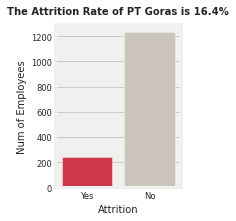

In [21]:
plt.figure(figsize = (2, 3))

sns.countplot(x = 'Attrition', data = df, palette = ['#e71d36', '#ccc5b9'])
# palette = 'coolwarm'
plt.title('The Attrition Rate of PT Goras is 16.4%', fontweight = 'bold')
plt.xlabel('Attrition')
plt.ylabel('Num of Employees')

# plt.savefig(f"{gd_path}/image/attrition-distribution.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/attrition-distribution.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

Sesuai dugaan awal, target klasifikasi (`Attrition`) memiliki ketimpangan distribusi, di mana *attrition rate*-nya sebesar 16,12%.

#### Numerical Feature Distribution (Boxplot)

In [22]:
# cek jumlah data numerik
print(f"Jumlah data numerik = {len(num)}")

Jumlah data numerik = 16


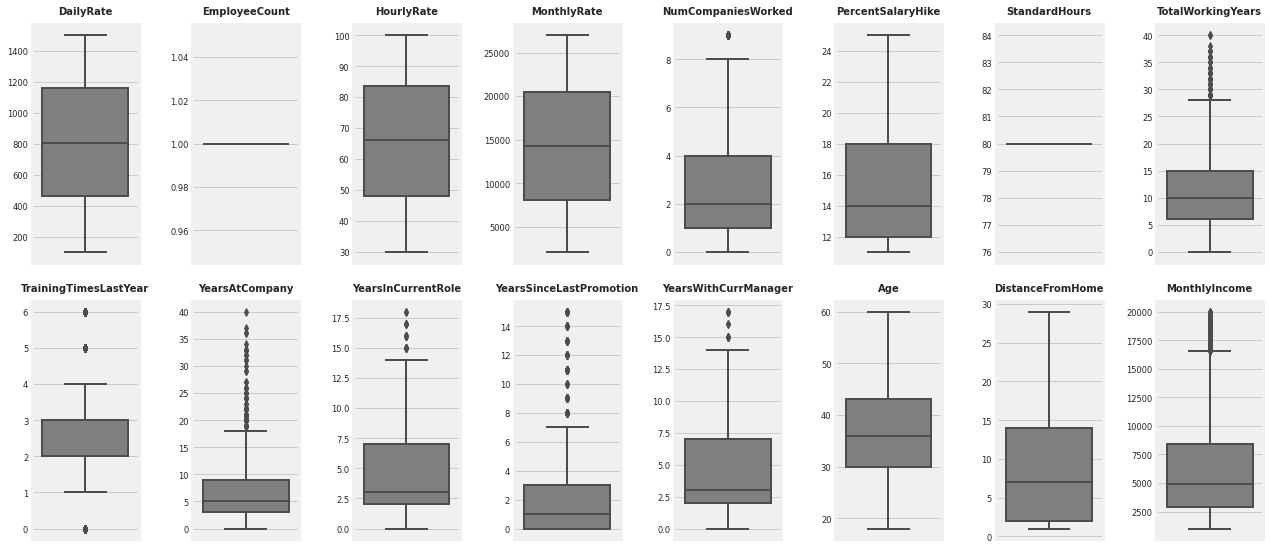

In [23]:
plt.figure(figsize = (18, 8))

for i in range(0, len(num)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[num[i]], color = 'grey', orient = 'v')
    
    plt.title(num[i], fontweight = 'bold')
    plt.ylabel('')

# plt.savefig(f"{gd_path}/image/num-feature-distribution-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/num-feature-distribution-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 2.0)
plt.show()

Dari box plot di atas, kita dapat mengetahui bahwa:
* Terdapat cukup banyak *outliers* di kolom:
  * `TotalWorkingYears`
  * `TrainingTimesLastYear`
  * `YearsAtCompany`
  * `YearsInCurrentRole`
  * `YearsSinceLastPromotion`
  * `YearsWithCurrManager`
  * `MonthlyIncome`
* Kebanyakan kolom yang mengandung *outliers* merupakan data total jumlah tahun, artinya pengalaman setiap karyawan cukup beragam.

#### Numerical Feature Distribution (Histogram)

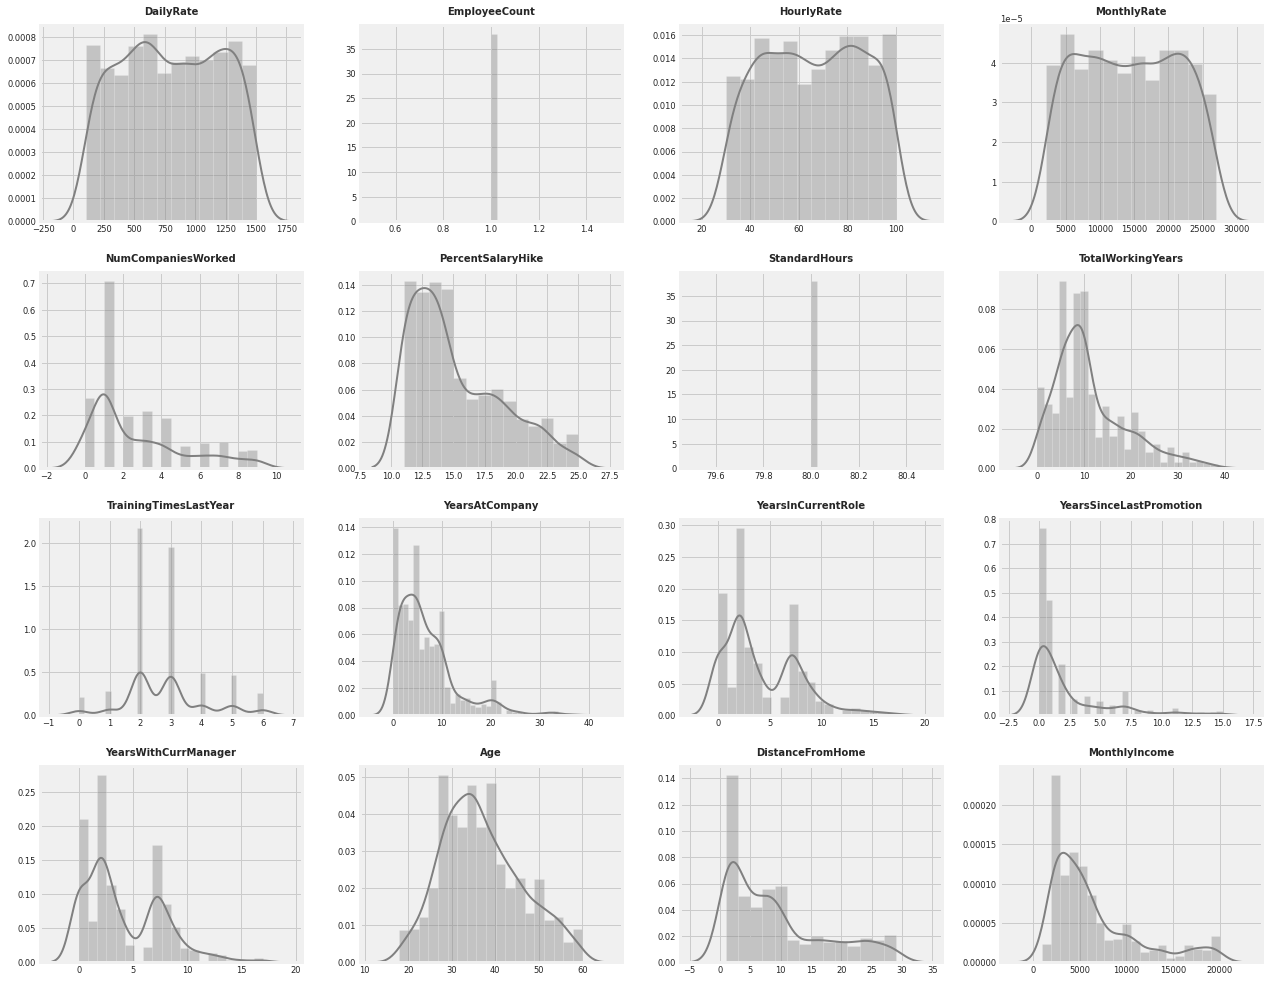

In [24]:
plt.figure(figsize = (18, 14))

for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df[num[i]], color = 'grey')
    
    plt.title(num[i], fontweight = 'bold')
    plt.xlabel('')
    plt.ylabel('')

# plt.savefig(f"{gd_path}/image/num-feature-distribution-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/num-feature-distribution-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 2.0)
plt.show()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `MonthlyIncome`, `PercentSalaryHike`, `YearsAtCompany` sedikit *skewed* ke kanan/*positively skewed*, artinya lebih banyak gaji karyawan yang cenderung rendah dan banyaknya karyawan yang bekerja di PT Goras kurang dari 1 tahun.
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja

#### Categorical Feature Distribution (Bar Plot)

In [25]:
# cek jumlah data numerik
print(f"Jumlah data kategorik = {len(kat)-1}") # target tidak termasuk

Jumlah data kategorik = 18


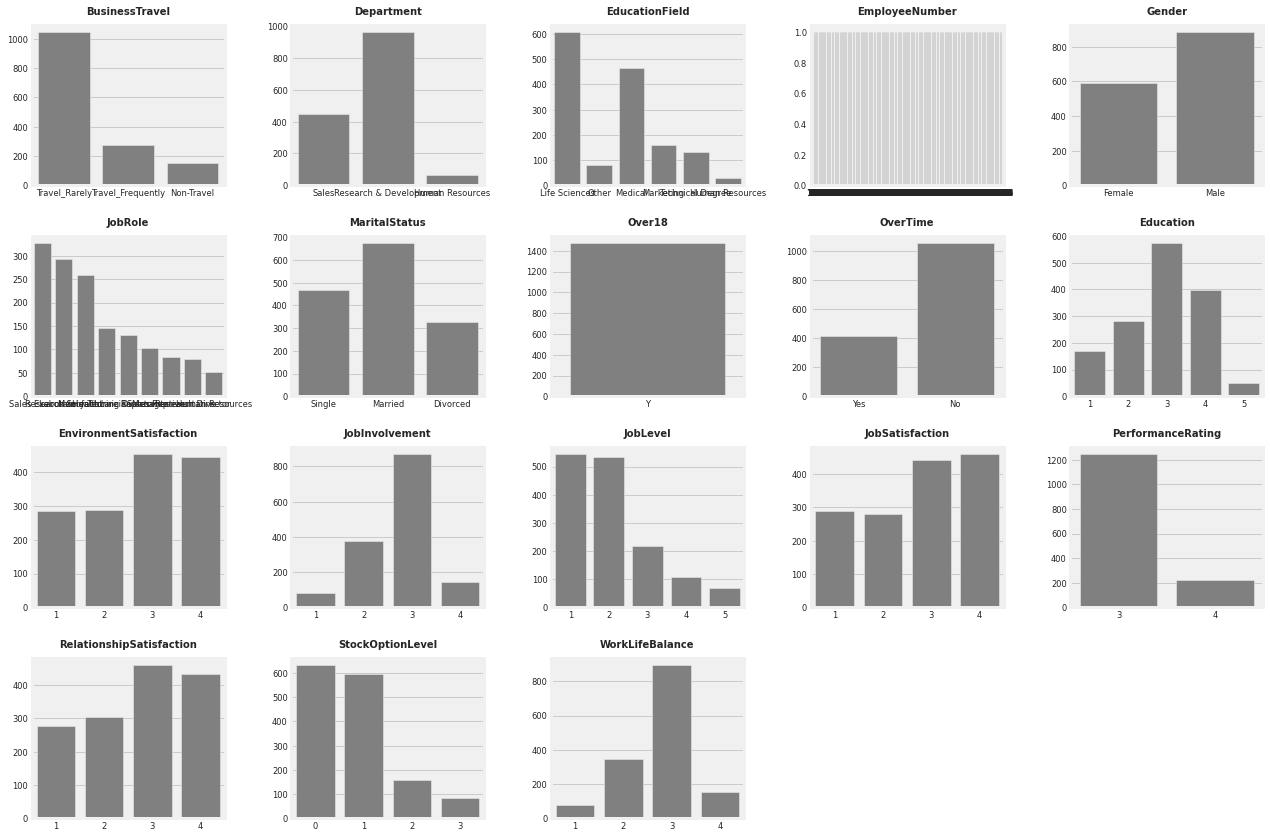

In [26]:
plt.figure(figsize = (18, 12))

for i in range(1, len(kat)):
    plt.subplot(4, 5, i)
    sns.countplot(df[kat[i]], color = 'grey', orient = 'v')
    
    plt.title(kat[i], fontweight = 'bold')
    plt.xlabel('')
    plt.ylabel('')

# plt.savefig(f"{gd_path}/image/cat-feature-distribution-barp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/cat-feature-distribution-barp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 2.0)
plt.show()

Dari count plot di atas, kita dapat mengetahui bahwa:
* Mayoritas karyawan memiliki frekuensi perjalanan bisnis yang tinggi, yaitu sekitar 1000 karyawan.
* *Research & Development* adalah departemen yang paling banyak jumlah karyawannya sejumlah 900-an karyawan.
* Perusahaan didominasi oleh karyawan laki-laki sebanyak 800-an karayawan.
* Perusahaan didominasi oleh karyawan yang berstatus menikah
* Hanya sebagian kecil karyawan yang bekerja lembur
* Perusahaan didominasi oleh karyawan yang berjenjang pendidikan sarjana
* Hanya sebagian kecil karyawan yang menunjukkan performa yang luar biasa (4: *outstanding*) dan tidak ada karyawan yang memiliki performa rendah (1: *low*)

### Multivariate Analysis

#### Numerical & Categorical Ordinal Correlation (Heatmap)

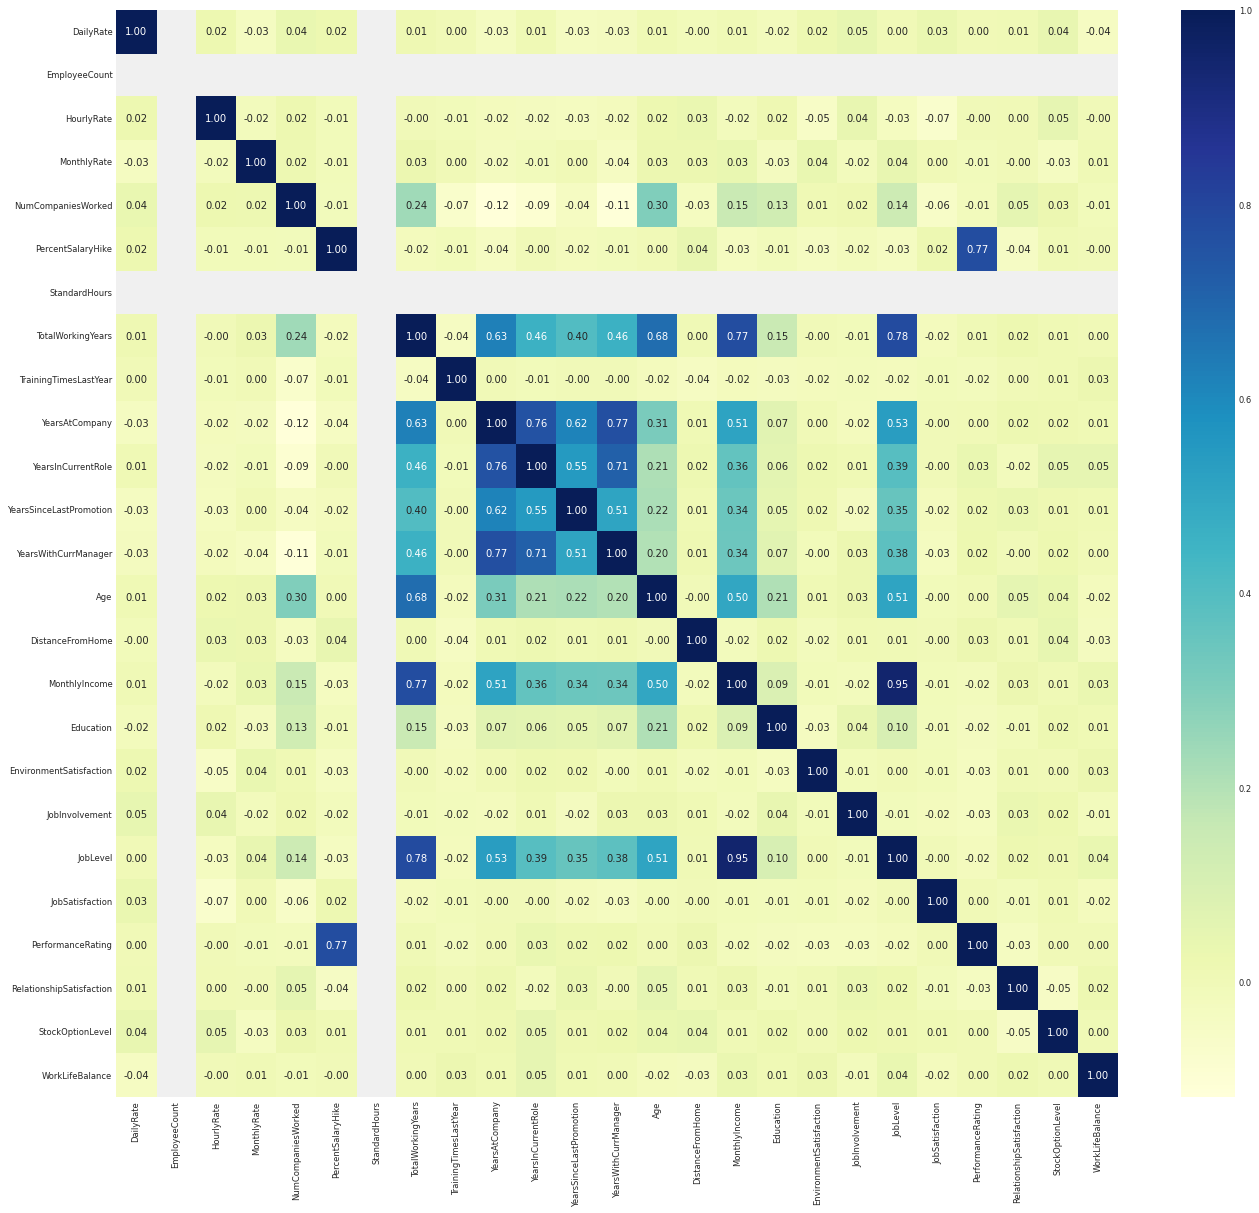

In [27]:
num_ord = num + kat_o # numerik + kategorik ordinal
plt.figure(figsize = (20, 20))
sns.heatmap(df[num_ord].corr(), cmap = 'YlGnBu', annot = True, fmt = '.2f')

# plt.savefig(f"{gd_path}/image/corr-heatmap.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/corr-heatmap.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

Observasi:
* `PercentSalaryHike` dan `PerformanceRating` memiliki hubungan positif yang cukup kuat
* `TotalWorkingYears` memiliki hubungan positif yang cukup kuat dengan `Age`, `MonthlyIncome`, dan `JobLevel`
* `YearsAtCompany` memiliki hubungan positif yang cukup kuat dengan `YearsInCurrentRole` dan `YearsWithCurrManager`

Perlu diperhatikan bahwa ketika salah satu *feature* tersebut berubah nilainya, maka *feature* lain yang berhubungan positif kuat juga mengalami perubahan yang sama.

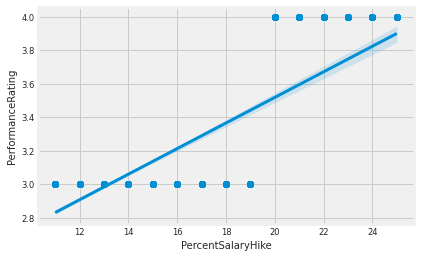

In [28]:
plt.figure(figsize = (6, 4))
sns.regplot(x = 'PercentSalaryHike', y = 'PerformanceRating', data = df)
# plt.savefig(f"{gd_path}/image/corr-1.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

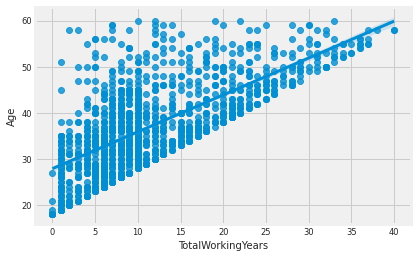

In [29]:
plt.figure(figsize = (6, 4))
sns.regplot(x = 'TotalWorkingYears', y = 'Age', data = df)
# plt.savefig(f"{gd_path}/image/corr-2.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

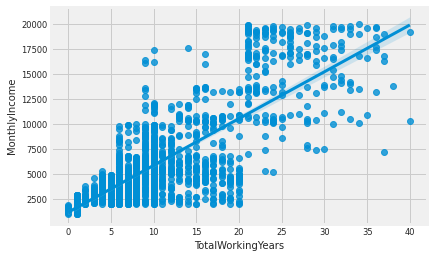

In [30]:
plt.figure(figsize = (6, 4))
sns.regplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = df)
# plt.savefig(f"{gd_path}/image/corr-3.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

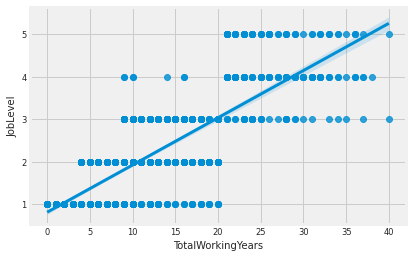

In [31]:
plt.figure(figsize = (6, 4))
sns.regplot(x = 'TotalWorkingYears', y = 'JobLevel', data = df)
# plt.savefig(f"{gd_path}/image/corr-4.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

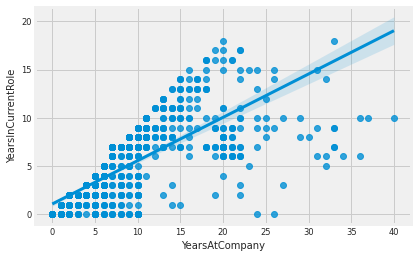

In [32]:
plt.figure(figsize = (6, 4))
sns.regplot(x = 'YearsAtCompany', y = 'YearsInCurrentRole', data = df)
# plt.savefig(f"{gd_path}/image/corr-5.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

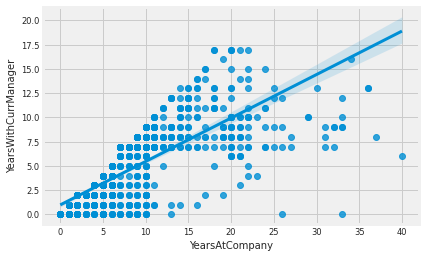

In [33]:
plt.figure(figsize = (6, 4))
sns.regplot(x = 'YearsAtCompany', y = 'YearsWithCurrManager', data = df)
# plt.savefig(f"{gd_path}/image/corr-6.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

#### Attrition Num of Each Numerical Feature (KDE Plot)

In [34]:
# cek jumlah data numerik + kategorik ordinal
print(f"Jumlah data numerik = {len(num)}")

Jumlah data numerik = 16


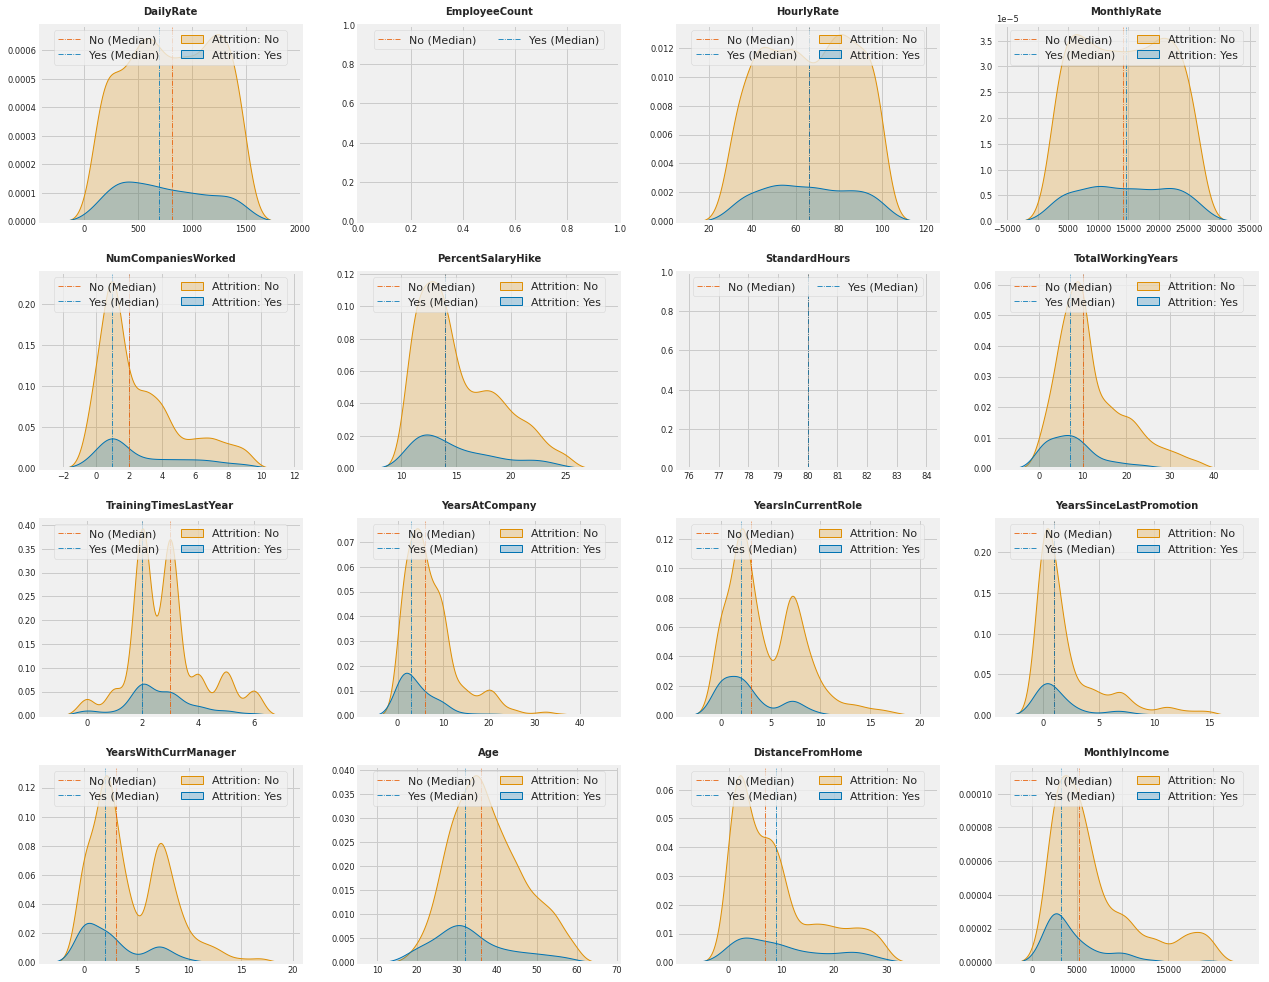

In [35]:
plt.figure(figsize = (18, 14))

for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x = num[i], hue = 'Attrition', data = df, palette = 'colorblind', linewidth = 1, fill = True, legend = True)
    
    plt.axvline(df[num[i]].loc[df['Attrition'] == 'No'].median(), color = '#e85d04', linewidth = 0.8, linestyle = '-.', label = 'No')
    plt.axvline(df[num[i]].loc[df['Attrition'] == 'Yes'].median(), color = '#0077b6', linewidth = 0.8, linestyle = '-.', label = 'Yes')
    
    plt.title(num[i], fontweight = 'bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(['No (Median)', 'Yes (Median)', 'Attrition: No', 'Attrition: Yes',], ncol = 2, loc = 'upper center')

# plt.savefig(f"{gd_path}/image/num-feature-attrition-kdep.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/num-feature-attrition-kdep.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 2.0)
plt.show()

#### Attrition Num & Rate of Each Categorical Feature (Bar Plot)

In [36]:
# cek jumlah data kategorik
print(f"Jumlah data kategorik = {len(kat)-1}") # kecuali attrition

Jumlah data kategorik = 18


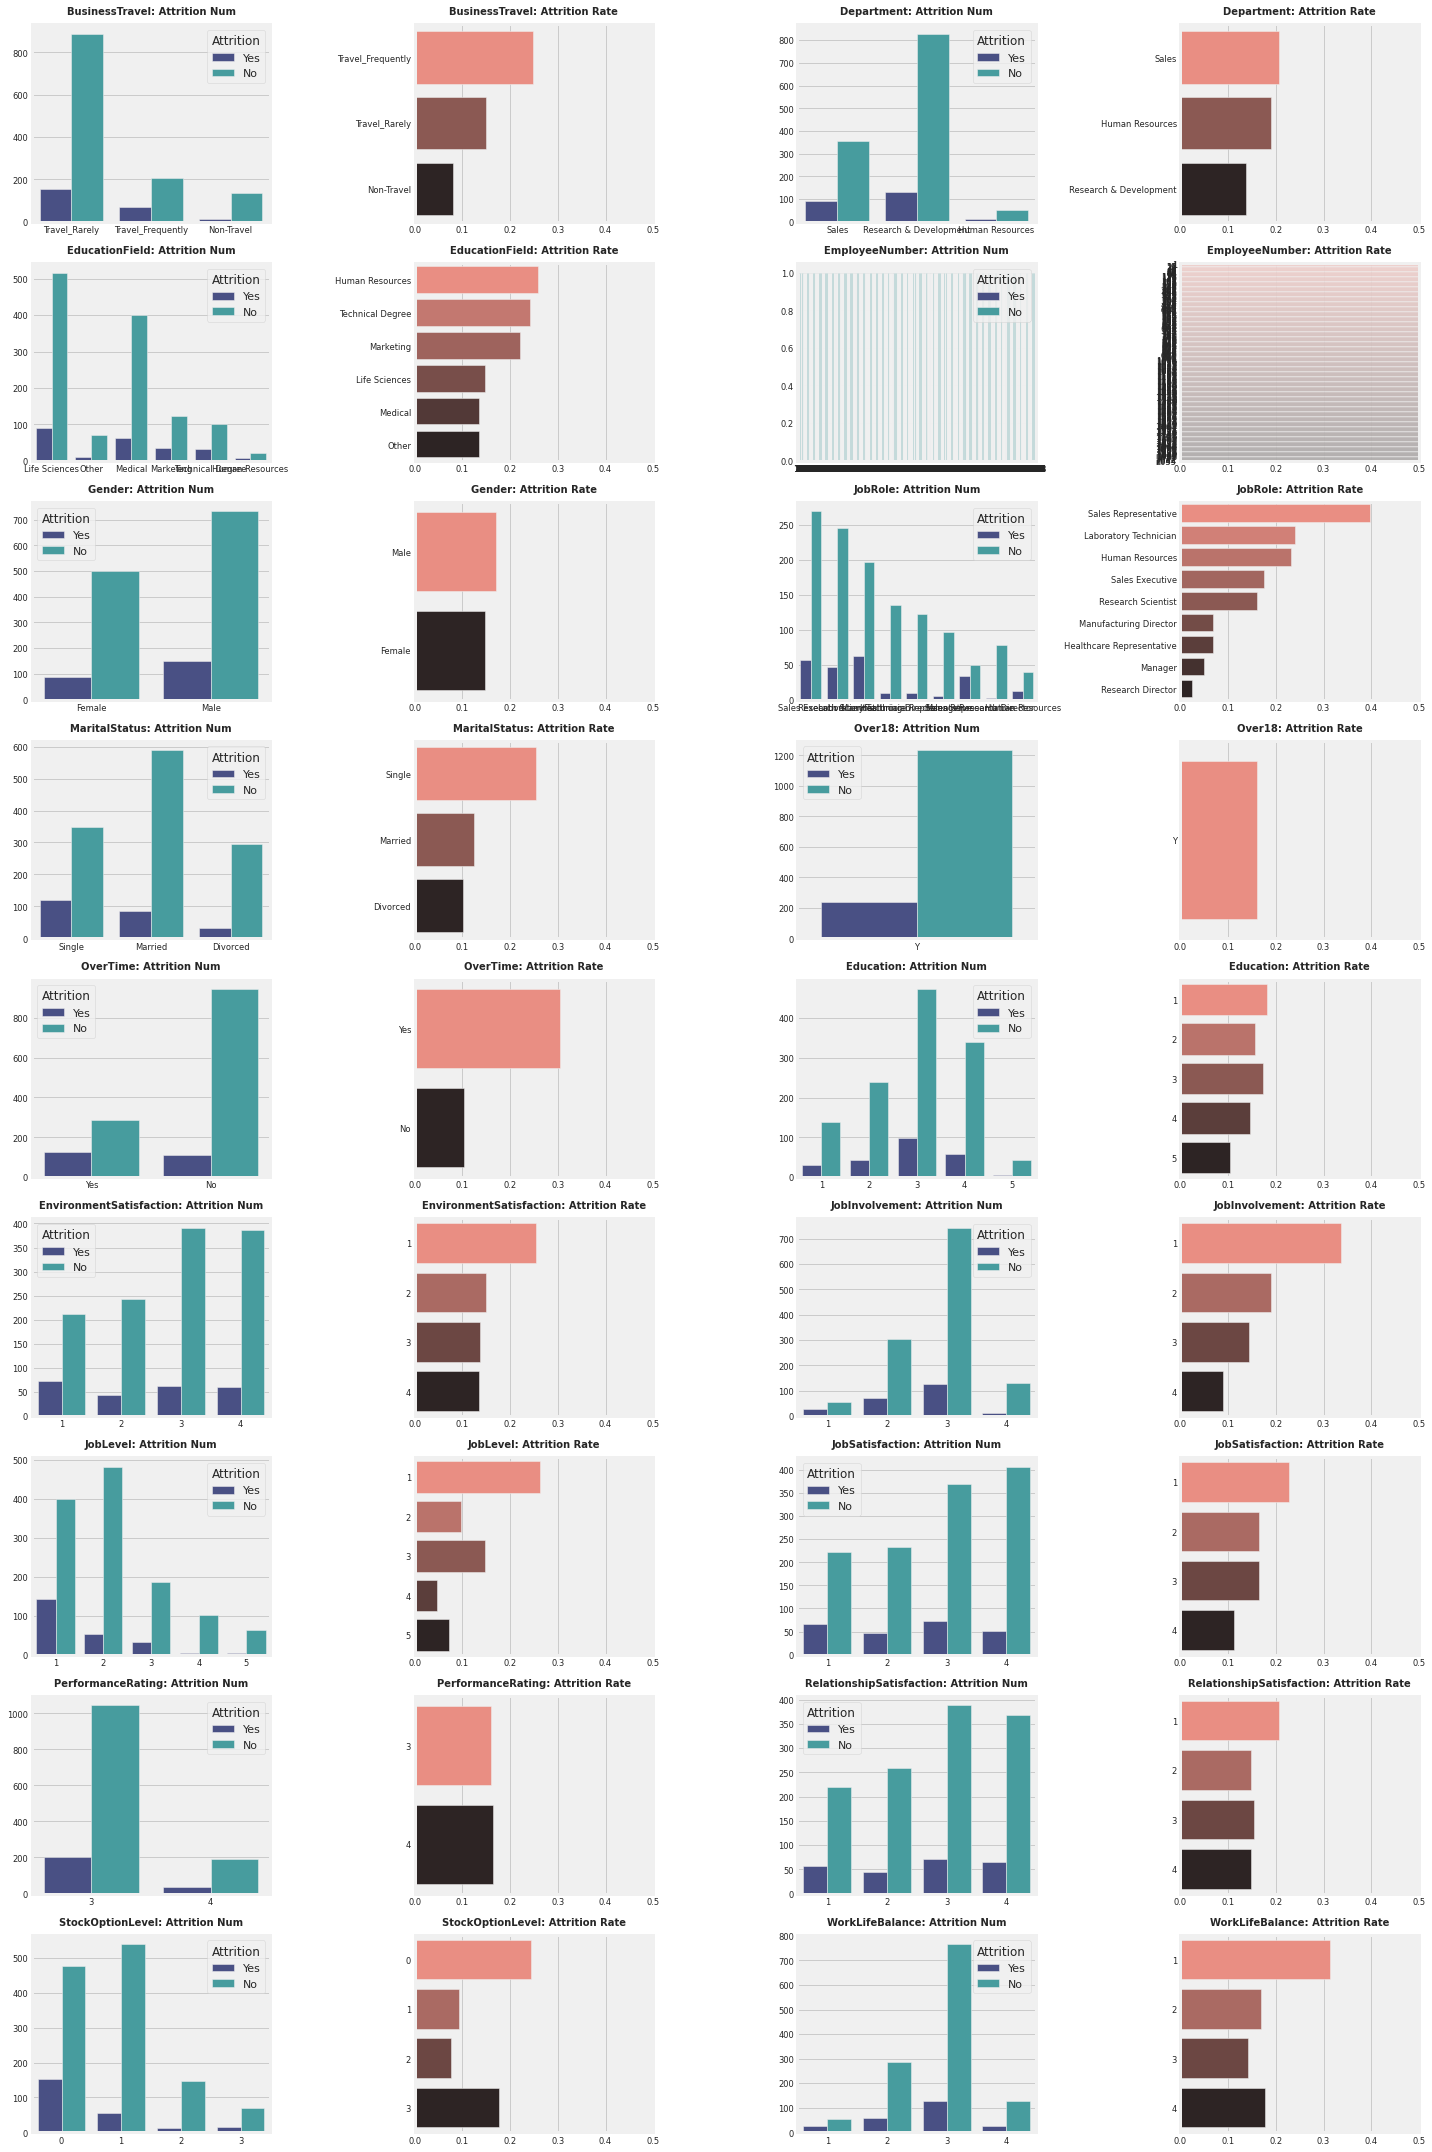

In [37]:
plt.figure(figsize = (20, 30))

k = 0
for i in range(1, len(kat)):
    # attrition num
    plt.subplot(9, 4, i+k)
    sns.countplot(x = kat[i], hue = 'Attrition', data = df_kat, palette = 'mako', orient = 'v')
    
    plt.title(f"{kat[i]}: Attrition Num", fontweight = 'bold')
    plt.xlabel('')
    plt.ylabel('')
    
    # attrition rate
    df_temp = df_kat.groupby([kat[i], 'Attrition']).size().reset_index().rename({0 : 'Size'}, axis = 1)
    df_temp['TotalSize'] = df_temp.groupby([kat[i]])['Size'].transform(sum)
    df_temp['AttritionRate'] = df_temp['Size'] / df_temp['TotalSize']
    
    df_temp = df_temp.loc[df_temp['Attrition'] == 'Yes'].reset_index(drop = True)
    df_temp = df_temp.sort_values(by = 'AttritionRate', ascending = False)
    
    plt.subplot(9, 4, i+k+1)
    sns.barplot(y = kat[i], x = 'AttritionRate', data = df_temp, palette = 'dark:salmon_r', orient = 'h')
    
    plt.title(f"{kat[i]}: Attrition Rate", fontweight = 'bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0.0, 0.5)
    
    k += 1

# plt.savefig(f"{gd_path}/image/cat-feature-attrition-barp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/cat-feature-attrition-barp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(w_pad = 0.5)
plt.show()

## EDA Observation Result

* Karyawan yang meninggalkan perusahaan cenderung berusia lebih muda (20-35 tahun) dibandingkan karyawan yang masih bertahan.
* Distribusi gaji (*hourly*/*daily*/*monthly rate*) karyawan yang meninggalkan perusahaan tidak jauh berbeda dengan karyawan yang masih bertahan, artinya tidak menjadi faktor yang cukup penting sebagai alasan meninggalkan perusahaan.
* Tidak jarang karyawan yang baru beberapa tahun saja bekerja di perusahaan (0-5 tahun) memutuskan untuk meninggalkan perusahaan, dibandingkan mereka yang sudah bekerja lebih dari 10 tahun tetap bertahan di perusahaan.
* Karyawan yang memiliki *monthly income* yang cenderung rendah (USD 0-5.000) memutuskan untuk meninggalkan perusahaan.
* Sekitar 150 karyawan yang kerap melakukan perjalanan bisnis cenderung memilih untuk keluar dari perusahaan, di mana *attrition rate*-nya pun paling tinggi dibandingkan karyawan yang jarang dan tidak melakukan perjalanan bisnis.
* *Sales Department* memiliki *attrition rate* tertinggi yaitu 20%, namun secara jumlah lebih banyak karyawan di *R&D Department*. (artinya lebih banyak *cost* yang dikeluarkan untuk melakukan *turnover* di departemen tersebut)
* *Background* pendidikan *Human Resourc*e memiliki *attrition rate* tertinggi yaitu 25%, namun terkecil secara jumlah karyawannya.
* Laki-Laki lebih banyak yang keluar dari perusahaan dibandingkan wanita, yaitu sekitar 150 orang.
* Dengan jumlahnya yang lebih sedikit, karyawan yang *overtime* memiliki *attrition rate* yang cukup tinggi, sebesar 30% atau 3x lipat dibandingkan yang tidak. (artinya sangat merugikan dari sisi *cost* untuk melakukan *turnover*)
* Kecenderungan *turnover* dari *Sales Representative* sangat tinggi dibandingkan *role* yang lain, disusul oleh *Laboratory Technician* dan *Human Resources*.
* Karyawan yang berstatus *single* memiliki *attrition rate* dan jumlah yang cukup tinggi dibandingkan *married* dan *divorce*, yaitu sebesar 25%.
* Semakin tinggi keterlibatan kerja (*job involvement*), semakin rendah *attrition rate*-nya.
* Karyawan yang memiliki kepuasaan rendah terhadap lingkungan kerja (*environment satisfaction*) memiliki *attrition rate* yang cukup tinggi.
* Kemungkinan ada hubungan dari *Travel Frequently*, *Sales Representative*, dan *Overtime*.

# Business Insight and Visualization

## Most of the Sales Representative in Sales Department who Worked Overtime Have Resigned 

In [38]:
df_dept_over = df.copy()

df_dept_over = df_dept_over.groupby(['Department', 'JobRole', 'OverTime', 'Attrition']).size().reset_index().rename({0: 'Size'}, axis = 1)
df_dept_over = df_dept_over.loc[df_dept_over['OverTime'] == 'Yes']

df_dept_over

,Department,JobRole,OverTime,Attrition,Size
2,Human Resources,Human Resources,Yes,No,8
3,Human Resources,Human Resources,Yes,Yes,5
5,Human Resources,Manager,Yes,No,4
8,Research & Development,Healthcare Representative,Yes,No,35
9,Research & Development,Healthcare Representative,Yes,Yes,2
12,Research & Development,Laboratory Technician,Yes,No,31
13,Research & Development,Laboratory Technician,Yes,Yes,31
15,Research & Development,Manager,Yes,No,10
16,Research & Development,Manager,Yes,Yes,3
19,Research & Development,Manufacturing Director,Yes,No,35


In [39]:
df_dept_over['JobRole'] = df_dept_over['JobRole'].apply(lambda x: x.replace(' ', '\n'))

df_dept_over['TotalSize'] = df_dept_over.groupby(['Department', 'JobRole'])['Size'].transform(sum)
df_dept_over['Rate'] = df_dept_over['Size'] / df_dept_over['TotalSize']

df_dept_over

,Department,JobRole,OverTime,Attrition,Size,TotalSize,Rate
2,Human Resources,Human\nResources,Yes,No,8,13,0.615385
3,Human Resources,Human\nResources,Yes,Yes,5,13,0.384615
5,Human Resources,Manager,Yes,No,4,4,1.000000
8,Research & Development,Healthcare\nRepresentative,Yes,No,35,37,0.945946
9,Research & Development,Healthcare\nRepresentative,Yes,Yes,2,37,0.054054
12,Research & Development,Laboratory\nTechnician,Yes,No,31,62,0.500000
13,Research & Development,Laboratory\nTechnician,Yes,Yes,31,62,0.500000
15,Research & Development,Manager,Yes,No,10,13,0.769231
16,Research & Development,Manager,Yes,Yes,3,13,0.230769
19,Research & Development,Manufacturing\nDirector,Yes,No,35,39,0.897436


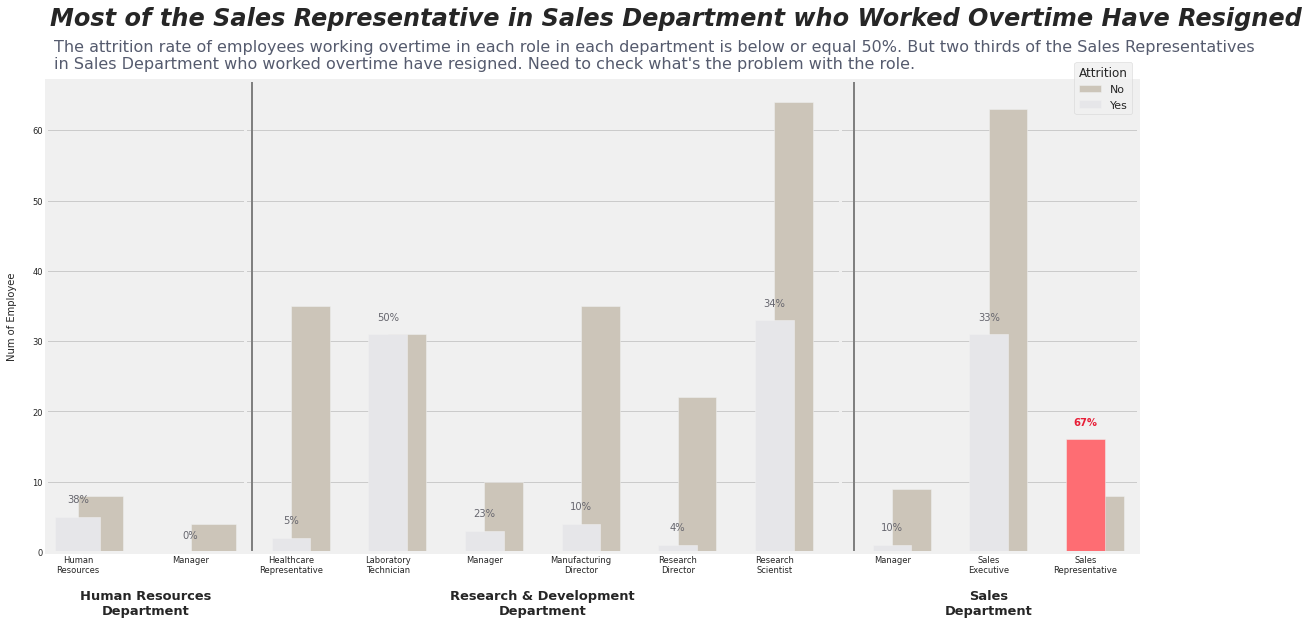

In [40]:
dept = df_dept_over['Department'].unique()
ls_width_ratios = []
for x in dept:
    value_counts = df_dept_over[['Department', 'JobRole']].drop_duplicates()['Department'].value_counts()
    ls_width_ratios.append(value_counts[x]/value_counts.sum())

fig, ax = plt.subplots(figsize = (16, 8), ncols = len(dept), gridspec_kw = {'width_ratios': ls_width_ratios}, sharey = True)

for i in range(len(dept)):
    df_dept_over_filterno = df_dept_over.loc[(df_dept_over['Department'] == dept[i]) & (df_dept_over['Attrition'] == 'No')]
    df_dept_over_filteryes = df_dept_over.loc[(df_dept_over['Department'] == dept[i]) & (df_dept_over['Attrition'] == 'Yes')]
    
    ax[i].bar(df_dept_over_filterno['JobRole'], df_dept_over_filterno['Size'], width = 0.4, align = 'edge', color = '#ccc5b9', label = 'No')
    
    rate = df_dept_over_filteryes['Rate'].reset_index(drop = True)
    size = df_dept_over_filteryes['Size'].reset_index(drop = True)
    if dept[i] == 'Sales':
        ax[i].bar(df_dept_over_filteryes['JobRole'], df_dept_over_filteryes['Size'], width = 0.4, align = 'center', color = ['#e6e6e9', '#e6e6e9', '#fe6d73'], label = 'Yes')
        for j, k in zip(range(len(rate)), size):
            if j == 2:
                ax[i].text(j, k+2, s = f"{rate[j]:.0%}", ha = 'center', fontweight = 'bold', color = '#e71d36')
            else:
                ax[i].text(j, k+2, s = f"{rate[j]:.0%}", ha = 'center', fontweight = 'light', color = '#66666e')
    else:
        ax[i].bar(df_dept_over_filteryes['JobRole'], df_dept_over_filteryes['Size'], width = 0.4, align = 'center', color = '#e6e6e9', label = 'Yes')
        if dept[i] == 'Human Resources':
            for j, k in zip(range(len(rate)), size):
                ax[i].text(j, k+2, s = f"{rate[j]:.0%}", ha = 'center', fontweight = 'light', color = '#66666e')
            ax[i].text(1, 2, s = f"{0:.0%}", ha = 'center', fontweight = 'light', color = '#66666e')
        else:
            for j, k in zip(range(len(rate)), size):
                ax[i].text(j, k+2, s = f"{rate[j]:.0%}", ha = 'center', fontweight = 'light', color = '#66666e')
    
    ax[i].grid(visible = False, axis = 'x')
    ax[i].set_xlabel(f"{dept[i]}\nDepartment", fontsize = 13, fontweight = 'bold', labelpad = 15)

fig.suptitle('Most of the Sales Representative in Sales Department who Worked Overtime Have Resigned', fontstyle = 'italic', fontweight = 'bold', fontsize = 24, x = 0.59, y = 1.08)
fig.text(0.05, 1, s = "The attrition rate of employees working overtime in each role in each department is below or equal 50%. But two thirds of the Sales Representatives \nin Sales Department who worked overtime have resigned. Need to check what's the problem with the role.", ha = 'left', va = 'center_baseline', color = '#555b6e', fontsize = 16)

ax[0].set_ylabel('Num of Employee', labelpad = 15)
ax[2].legend(title = 'Attrition', ncol = 1, loc = 'upper right', bbox_to_anchor = (1.0, 1.05), markerfirst = True, frameon = True)

ax[1].axvline(x = -0.4, color = 'grey')
ax[2].axvline(x = -0.4, color = 'grey')

fig.tight_layout(w_pad = 0)
# fig.savefig(f"{gd_path}/image/sales-representative-overtime-resigned.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# fig.savefig(f"{gd_path}/image/sales-representative-overtime-resigned.jpg", bbox_inches = 'tight', dpi = 150)
fig.show()

## Group Age x Overtime

In [41]:
df_eda = df.copy()

In [42]:
df_eda['GroupAge'] = np.where(df_eda['Age'] <= 30, '18-30',
                              np.where((df_eda['Age'] > 30) & (df_eda['Age'] <= 40), '31-40',
                                       np.where((df_eda['Age'] > 40) & (df_eda['Age'] <= 50), '41-50', '51-60')))

In [43]:
# group age x overtime
df_age = df_eda.groupby(['GroupAge', 'OverTime', 'Attrition']).size().reset_index()
df_age = df_age.rename({0 : 'Size'}, axis = 1)
df_age['Total'] = df_age.groupby(['GroupAge', 'OverTime'])['Size'].transform('sum')
df_age['Pct'] = df_age['Size'] / df_age['Total']
df_age = df_age.loc[df_age['OverTime'] == 'Yes'].reset_index(drop = True)
df_age

,GroupAge,OverTime,Attrition,Size,Total,Pct
0,18-30,Yes,No,53,106,0.500000
1,18-30,Yes,Yes,53,106,0.500000
2,31-40,Yes,No,119,166,0.716867
3,31-40,Yes,Yes,47,166,0.283133
4,41-50,Yes,No,82,100,0.820000
5,41-50,Yes,Yes,18,100,0.180000
6,51-60,Yes,No,35,44,0.795455
7,51-60,Yes,Yes,9,44,0.204545


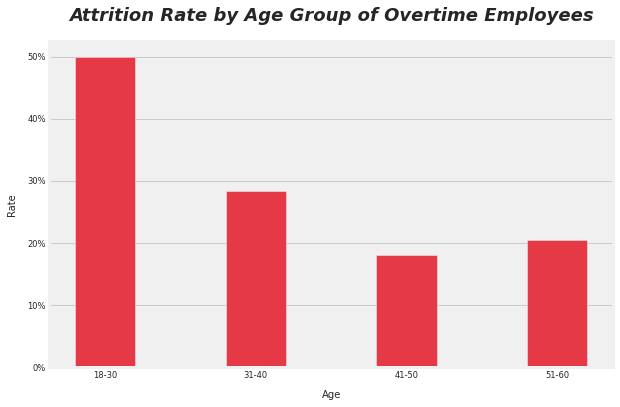

In [44]:
# plot
plt.figure(figsize = (9, 6))

x_yes = df_age.loc[df_age['Attrition'] == 'Yes']['GroupAge']
y_yes = df_age.loc[df_age['Attrition'] == 'Yes']['Pct']
# x_no = df_age.loc[df_age['Attrition'] == 'No']['GroupAge']
# y_no = df_age.loc[df_age['Attrition'] == 'No']['Pct']

# plt.bar(x_no, y_no, width = 0.4, align = 'edge', color = '#ccc5b9', label = 'No')
plt.bar(x_yes, y_yes, width = 0.4, align = 'center', color = '#e63946', label = 'Yes')

plt.xlabel('Age', labelpad = 10)
plt.ylabel('Rate', labelpad = 10)
yticks = list(np.arange(0, 0.6, 0.1))
yticks_pct = []
for i in yticks:
    x = "{:.0%}".format(i)
    yticks_pct.append(x)
plt.yticks(yticks, yticks_pct)
plt.title('Attrition Rate by Age Group of Overtime Employees', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 20)
plt.grid(visible = False, axis = 'x')
# plt.legend(title = 'Attrition', ncol = 1)

# plt.savefig(f"{gd_path}/image/overtime-groupage.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/overtime-groupage.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

## Job Level x Overtime

In [45]:
# job level x overtime
df_joblev = df_eda.groupby(['JobLevel', 'OverTime', 'Attrition']).size().reset_index()
df_joblev = df_joblev.rename({0 : 'Size'}, axis = 1)
df_joblev['Total'] = df_joblev.groupby(['JobLevel', 'OverTime'])['Size'].transform('sum')
df_joblev['Pct'] = df_joblev['Size'] / df_joblev['Total']
df_joblev = df_joblev.loc[df_joblev['OverTime'] == 'Yes'].reset_index(drop = True)
df_joblev

,JobLevel,OverTime,Attrition,Size,Total,Pct
0,1,Yes,No,74,156,0.474359
1,1,Yes,Yes,82,156,0.525641
2,2,Yes,No,120,146,0.821918
3,2,Yes,Yes,26,146,0.178082
4,3,Yes,No,50,63,0.793651
5,3,Yes,Yes,13,63,0.206349
6,4,Yes,No,30,33,0.909091
7,4,Yes,Yes,3,33,0.090909
8,5,Yes,No,15,18,0.833333
9,5,Yes,Yes,3,18,0.166667


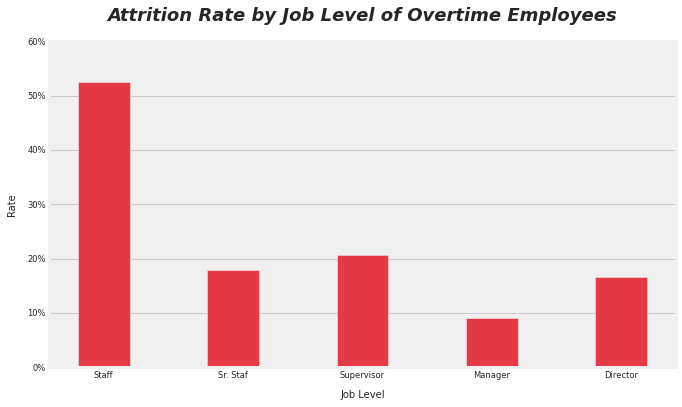

In [46]:
# plot
plt.figure(figsize = (10, 6))

x_yes = df_joblev.loc[df_joblev['Attrition'] == 'Yes']['JobLevel']
y_yes = df_joblev.loc[df_joblev['Attrition'] == 'Yes']['Pct']
# x_no = df_joblev.loc[df_joblev['Attrition'] == 'No']['JobLevel']
# y_no = df_joblev.loc[df_joblev['Attrition'] == 'No']['Pct']

# plt.bar(x_no, y_no, width = 0.4, align = 'edge', color = '#ccc5b9', label = 'No')
plt.bar(x_yes, y_yes, width = 0.4, align = 'center', color = '#e63946', label = 'Yes')

plt.xlabel('Job Level', labelpad = 10)
plt.ylabel('Rate', labelpad = 10)
plt.xticks([1, 2, 3, 4, 5], ['Staff', 'Sr. Staf', 'Supervisor', 'Manager', 'Director'])
yticks = list(np.arange(0, 0.7, 0.1))
yticks_pct = []
for i in yticks:
    x = "{:.0%}".format(i)
    yticks_pct.append(x)
plt.yticks(yticks, yticks_pct)
plt.title('Attrition Rate by Job Level of Overtime Employees', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 20)
plt.grid(visible = False, axis = 'x')
# plt.legend(title = 'Attrition', ncol = 1)

# plt.savefig(f"{gd_path}/image/overtime-joblevel.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/overtime-joblevel.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

## Job Level x Monthly Income x Overtime

In [47]:
MedIncome = df_eda.groupby(['JobLevel'])['MonthlyIncome'].median()
MedIncome

JobLevel
1     2670
2     5340
3     9980
4    16154
5    19232
Name: MonthlyIncome, dtype: int64

In [48]:
df_eda['BelowMedIncome'] = df_eda['JobLevel'].apply(lambda x: MedIncome[x])
df_eda['BelowMedIncome'] = np.where(df_eda['MonthlyIncome'] < df_eda['BelowMedIncome'], 1, 0)

In [49]:
# job level x monthly income x overtime
df_income = df_eda.groupby(['JobLevel', 'BelowMedIncome', 'OverTime', 'Attrition']).size().reset_index()
df_income = df_income.rename({0 : 'Size'}, axis = 1)
df_income['Total'] = df_income.groupby(['JobLevel', 'BelowMedIncome', 'OverTime'])['Size'].transform('sum')
df_income['Pct'] = df_income['Size'] / df_income['Total']
df_income = df_income.loc[(df_income['OverTime'] == 'Yes') & (df_income['BelowMedIncome'] == 1)].reset_index(drop = True)
df_income

,JobLevel,BelowMedIncome,OverTime,Attrition,Size,Total,Pct
0,1,1,Yes,No,29,81,0.358025
1,1,1,Yes,Yes,52,81,0.641975
2,2,1,Yes,No,56,64,0.875000
3,2,1,Yes,Yes,8,64,0.125000
4,3,1,Yes,No,22,29,0.758621
5,3,1,Yes,Yes,7,29,0.241379
6,4,1,Yes,No,17,20,0.850000
7,4,1,Yes,Yes,3,20,0.150000
8,5,1,Yes,No,7,8,0.875000
9,5,1,Yes,Yes,1,8,0.125000


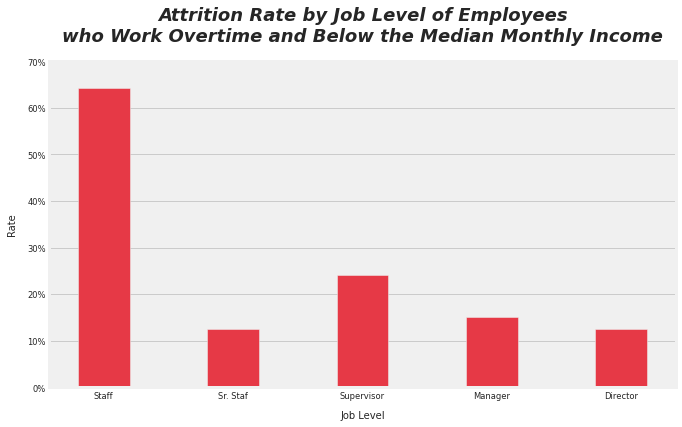

In [50]:
# plot
plt.figure(figsize = (10, 6))

x_yes = df_income.loc[df_income['Attrition'] == 'Yes']['JobLevel']
y_yes = df_income.loc[df_income['Attrition'] == 'Yes']['Pct']
# x_no = df_income.loc[df_income['Attrition'] == 'No']['JobLevel']
# y_no = df_income.loc[df_income['Attrition'] == 'No']['Pct']

# plt.bar(x_no, y_no, width = 0.4, align = 'edge', color = '#ccc5b9', label = 'No')
plt.bar(x_yes, y_yes, width = 0.4, align = 'center', color = '#e63946', label = 'Yes')

plt.xlabel('Job Level', labelpad = 10)
plt.ylabel('Rate', labelpad = 10)
plt.xticks([1, 2, 3, 4, 5], ['Staff', 'Sr. Staf', 'Supervisor', 'Manager', 'Director'])
yticks = list(np.arange(0, 0.8, 0.1))
yticks_pct = []
for i in yticks:
    x = "{:.0%}".format(i)
    yticks_pct.append(x)
plt.yticks(yticks, yticks_pct)
plt.title('Attrition Rate by Job Level of Employees\nwho Work Overtime and Below the Median Monthly Income', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 20)
plt.grid(visible = False, axis = 'x')
# plt.legend(title = 'Attrition', ncol = 1)

# plt.savefig(f"{gd_path}/image/overtime-joblevel-belowmedincome.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/overtime-joblevel-belowmedincome.jpg", bbox_inches = 'tight', dpi = 150)
plt.show()

## The Key Factor of Attrition in Each Department

In [51]:
# cek tipe data kategorik
df[kat].dtypes

Attrition                   object
BusinessTravel              object
Department                  object
EducationField              object
EmployeeNumber               int64
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
OverTime                    object
Education                    int64
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
WorkLifeBalance              int64
dtype: object

In [52]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [53]:
df_imp = df.copy()

df_imp['BusinessTravel'] = df_imp['BusinessTravel'].map({'Non-Travel' : 0, 'Travel_Rarely' : 1, 'Travel_Frequently' : 2})
df_imp['Gender'] = df_imp['Gender'].map({'Male' : 0, 'Female' : 1})
df_imp['OverTime'] = df_imp['OverTime'].map({'No' : 0, 'Yes' : 1})
df_imp['MaritalStatus'] = df_imp['MaritalStatus'].map({'Single' : 0, 'Married' : 1, 'Divorced' : 2})

df_imp['EducationField'] = df_imp['EducationField'].astype('category').cat.codes
df_imp['JobRole'] = df_imp['JobRole'].astype('category').cat.codes

df_imp = df_imp.drop(['Over18', 'EmployeeNumber'], axis = 1)

In [54]:
# cek tipe data setelah encoding
df_imp.dtypes

Age                          int64
Attrition                   object
BusinessTravel               int64
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField                int8
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                       int8
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [55]:
df_imp['Department'].nunique()

3

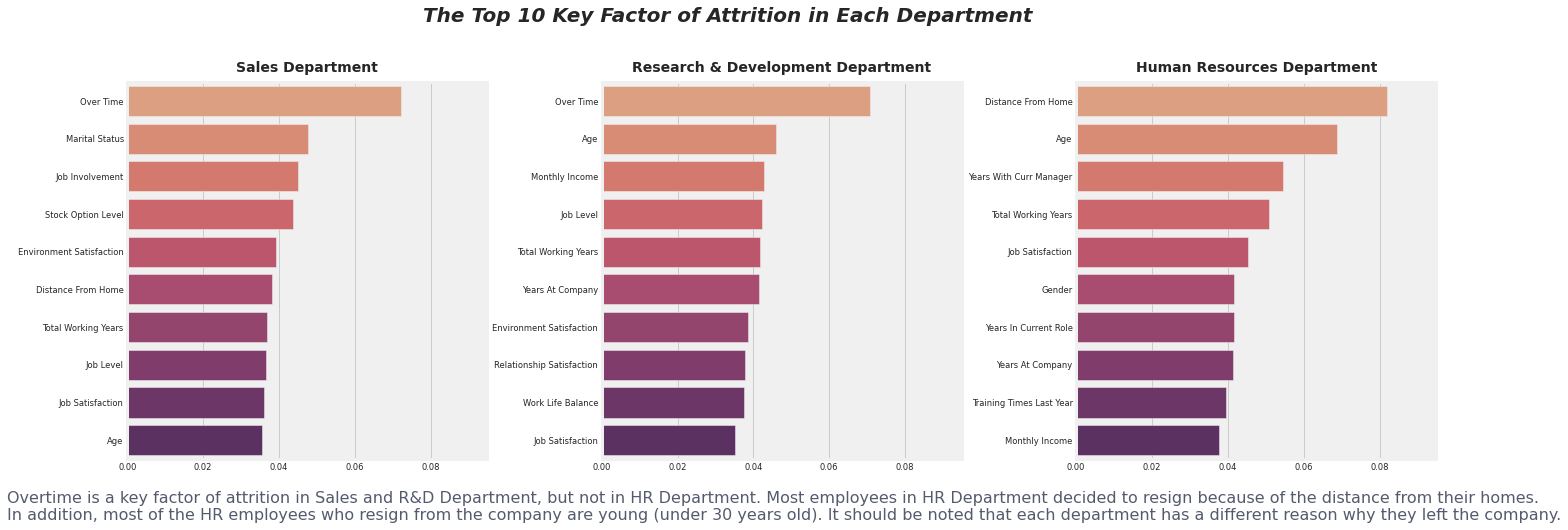

In [56]:
dept_unique = df_imp['Department'].unique()

fig = plt.figure(figsize = (20, 6))

for i in range(0, len(dept_unique)):
    x = df_imp.loc[df_imp['Department'] == dept_unique[i]].drop(['Attrition', 'Department'], axis = 1) # feature
    y = df_imp.loc[df_imp['Department'] == dept_unique[i]]['Attrition'] # target
    
    feat_importance = ExtraTreesClassifier().fit(x, y).feature_importances_
        
    feat_imp = pd.DataFrame({'column' : x.columns, 'value' : feat_importance}).sort_values('value', ascending = False).reset_index(drop = True)
    feat_imp['column'] = feat_imp['column'].apply(lambda x: " ".join(re.findall('[A-Z][^A-Z]*', x)))
    
    plt.subplot(1, 3, i+1)
    sns.barplot(y = 'column', x = 'value', data = feat_imp.iloc[0:10], palette = 'flare')
    
    plt.title(f"{df_imp['Department'].unique()[i]} Department", fontweight = 'bold', fontsize = 14)
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0.0, 0.095)

fig.suptitle("The Top 10 Key Factor of Attrition in Each Department", fontstyle = 'italic', fontweight = 'bold', fontsize = 20, y = 1.1)
fig.text(x = 0, y = -0.05, s = "Overtime is a key factor of attrition in Sales and R&D Department, but not in HR Department. Most employees in HR Department decided to resign because of the distance from their homes. \nIn addition, most of the HR employees who resign from the company are young (under 30 years old). It should be noted that each department has a different reason why they left the company.", ha = 'left', va = 'center_baseline', color = '#555b6e', fontsize = 16)

fig.tight_layout(w_pad = 0.5)
# fig.savefig(f"{gd_path}/image/attrition-key-factor-department.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# fig.savefig(f"{gd_path}/image/attrition-key-factor-department.jpg", bbox_inches = 'tight', dpi = 150)
fig.show()

# Data Cleansing

In [57]:
# menyalin dataset mentah
df_clean = df_raw.copy()

* `df_raw` = dataset mentah
* `df_clean` = dataset yang sudah dilakukan cleansing (drop columns, drop rows, encoding, dll)

Gunakan `df_clean` jika ingin melakukan proses cleansing agar data mentah tetap terjaga nilainya.

## Handling Single & Unique Data

*Single data yang dimaksud adalah kolom yang memiliki 1 unique value saja.*

*Unique data yang dimaksud adalah kolom yang seluruh barisnya berisi unique value (seperti identitas karyawan).*

In [58]:
df_clean.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

`EmployeeCount`, `Over18`, `StandardHours` adalah kolom yang hanya memiliki 1 unique value.

`EmployeeNumber` adalah kolom yang seluruh barisnya berisi unique value.

In [59]:
bef = len(df_clean.columns) # jumlah kolom sebelum dihapus
df_clean = df_clean.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1) # hapus kolom
aft = len(df_clean.columns) # jumlah kolom setelah dihapus
print(f"Jumlah kolom berkurang dari {bef} menjadi {aft}.")

Jumlah kolom berkurang dari 35 menjadi 31.


## Handling Missing Data

In [60]:
df_clean.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

tidak ada data yang kosong pada setiap kolom yang ada di dataframe

## Handling Duplicated Data

In [61]:
df_clean.duplicated().sum()

0

tidak ada yang duplicated setiap kolomnya 

## Handling Outliers

In [62]:
df_num.describe()

,DailyRate,EmployeeCount,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DistanceFromHome,MonthlyIncome
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,1.0,65.891156,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129,36.923810,9.192517,6502.931293
std,403.509100,0.0,20.329428,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136,9.135373,8.106864,4707.956783
min,102.000000,1.0,30.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1009.000000
25%,465.000000,1.0,48.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,2.000000,2911.000000
50%,802.000000,1.0,66.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,7.000000,4919.000000
75%,1157.000000,1.0,83.750000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,14.000000,8379.000000
max,1499.000000,1.0,100.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000,60.000000,29.000000,19999.000000


In [63]:
df_num.shape[0]

1470

In [64]:
# kolom yang akan dihapus outliersnya
cols = ['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome']

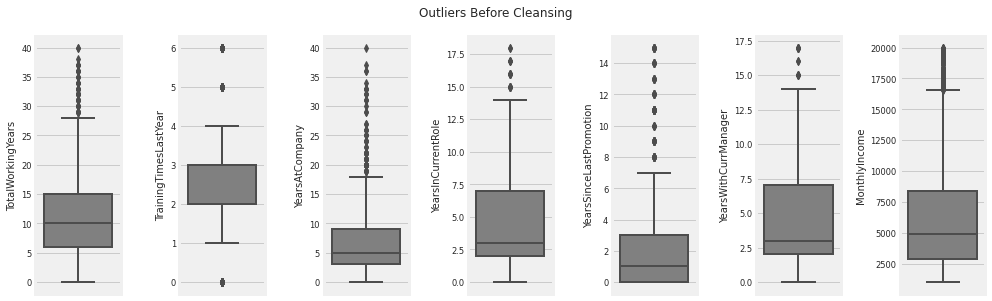

In [65]:
# Sebelum
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_clean[cols[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers Before Cleansing', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

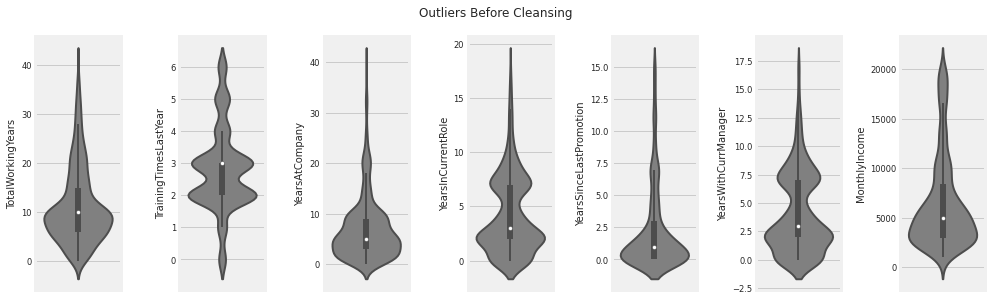

In [66]:
#Sebelum
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df_clean[cols[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers Before Cleansing', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

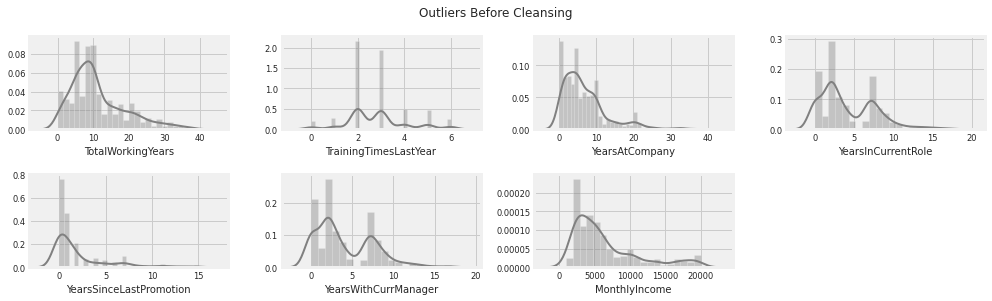

In [67]:
# Sebelum
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_clean[cols[i]], color = 'grey')
    plt.ylabel('')

plt.suptitle('Outliers Before Cleansing', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

### Z-Score Method

In [68]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

for col in cols:
    zscore = abs(stats.zscore(df_clean[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_ZSCORE = df_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_ZSCORE)}')

Jumlah baris sebelum memfilter outlier: 1470
Jumlah baris setelah memfilter outlier: 1387


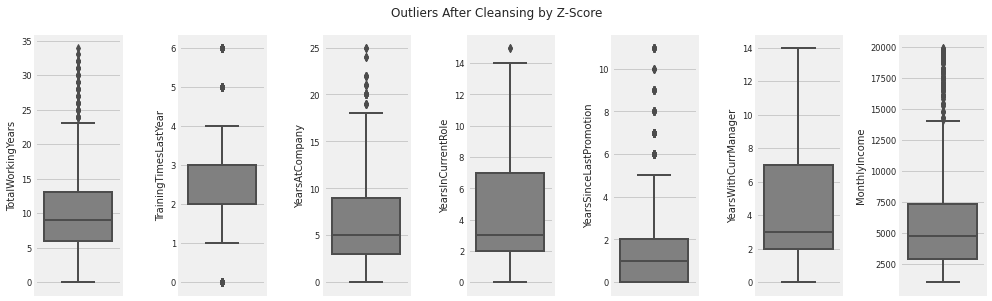

In [69]:
# Sesudah menggunakan ZSCORE
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_ZSCORE[cols[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by Z-Score', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

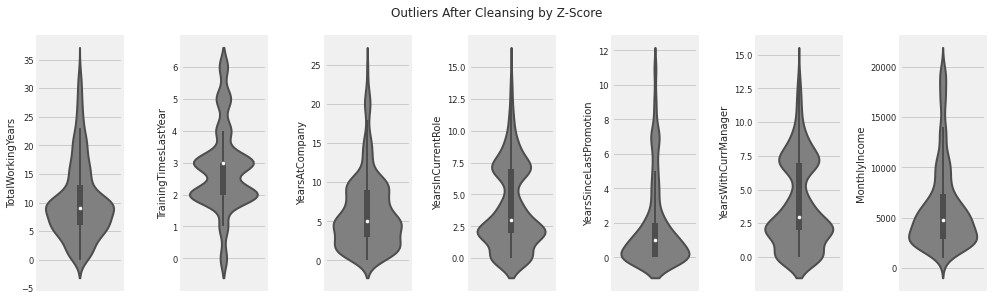

In [70]:
# Sesudah menggunakan ZSCORE
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df_ZSCORE[cols[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by Z-Score', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

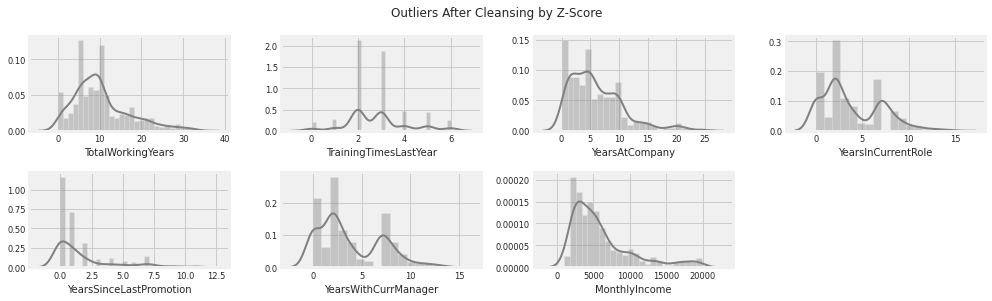

In [71]:
# Sesudah menggunakan ZSCORE
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_ZSCORE[cols[i]], color = 'grey')
    plt.ylabel('')

plt.suptitle('Outliers After Cleansing by Z-Score', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

### IQR Method

In [72]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))
for col in cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries
    
df_IQR = df_clean[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_IQR)}')

Jumlah baris sebelum memfilter outlier: 1470
Jumlah baris setelah memfilter outlier: 1024


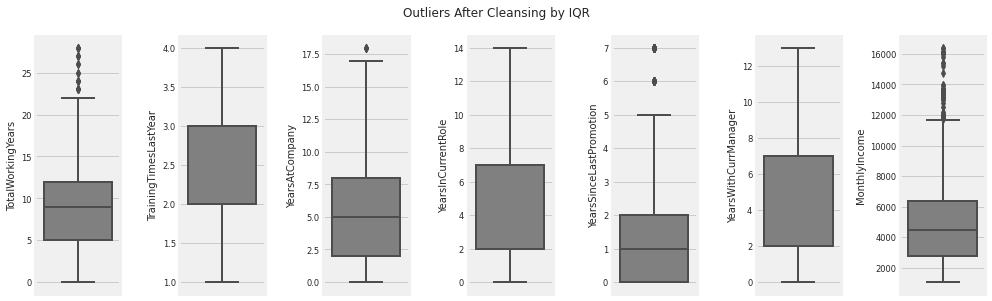

In [73]:
# Sesudah menggunakan IQR
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_IQR[cols[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by IQR', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

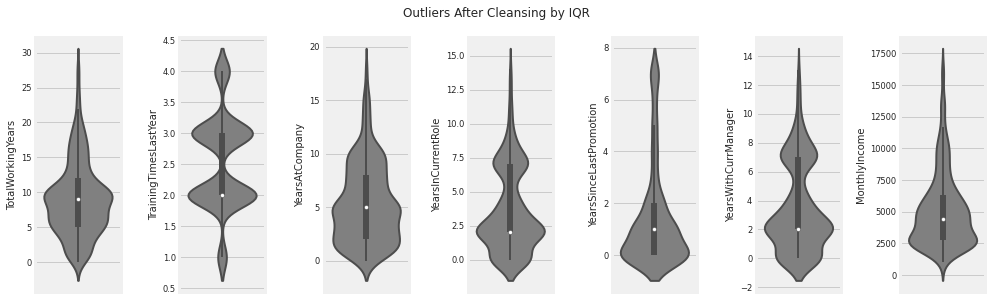

In [75]:
# Sesudah menggunakan IQR
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df_IQR[cols[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by IQR', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

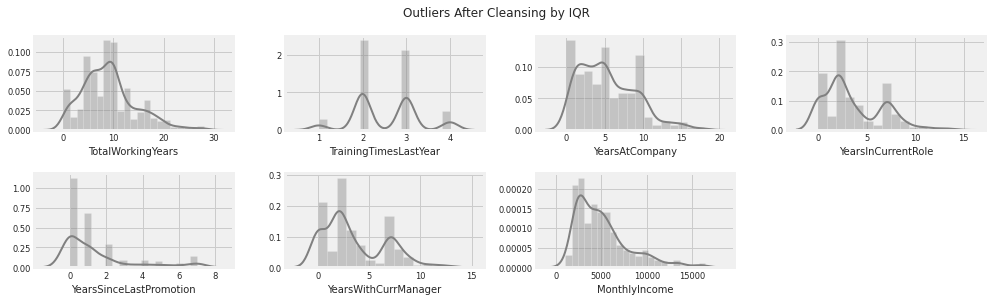

In [76]:
# Sesudah menggunakan IQR
plt.figure(figsize = (14, 4))
for i in range(0, len(cols)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_IQR[cols[i]], color = 'grey')
    plt.ylabel('')

plt.suptitle('Outliers After Cleansing by IQR', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

### Result

zscore lebih cocok digunakan karena data yang dihilangkan tidak banyak dan tidak terlalu banyak seperti ketika menggunakan IQR

In [77]:
df_clean = df_ZSCORE.copy()
df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# Feature Engineering

## Create New Features

In [78]:
# tambah fitur group age
df_clean['GroupAge'] = np.where(df_clean['Age'] <= 30, '18-30',
                                np.where((df_clean['Age'] > 30) & (df_clean['Age'] <= 40), '31-40',
                                         np.where((df_clean['Age'] > 40) & (df_clean['Age'] <= 50), '41-50', '51-60')))
df_clean[['Age', 'GroupAge']]

,Age,GroupAge
0,41,41-50
1,49,41-50
2,37,31-40
3,33,31-40
4,27,18-30
...,...,...
1465,36,31-40
1466,39,31-40
1467,27,18-30
1468,49,41-50


In [79]:
# median monthly income per job level
MedIncome = df_clean.groupby(['JobLevel'])['MonthlyIncome'].median()
MedIncome

JobLevel
1     2661.5
2     5343.0
3     9852.0
4    15992.0
5    19174.0
Name: MonthlyIncome, dtype: float64

In [80]:
# tambah fitur median monthly income per job level (below == 1, above == 0)
df_clean['BelowMedIncome'] = df_clean['JobLevel'].apply(lambda x: MedIncome[x])
df_clean['BelowMedIncome'] = np.where(df_clean['MonthlyIncome'] < df_clean['BelowMedIncome'], 1, 0)

In [81]:
# tambah fitur group age (18-30) & overtime (yes)
df_clean['GroupAge_Overtime'] = np.where((df_clean['GroupAge'] == '18-30') & (df_clean['OverTime'] == 'Yes'), 1, 0)

# tambah fitur job level (1) & overtime (yes)
df_clean['JobLevel_Overtime'] = np.where((df_clean['JobLevel'] == 1) & (df_clean['OverTime'] == 'Yes'), 1, 0)

# tambah fitur job level (1) & below median monthly income (1) & overtime (yes)
df_clean['JobLevel_BelowMedIncome_Overtime'] = np.where((df_clean['JobLevel'] == 1) & (df_clean['BelowMedIncome'] == 1) & (df_clean['OverTime'] == 'Yes'), 1, 0)

In [82]:
df_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,GroupAge,BelowMedIncome,GroupAge_Overtime,JobLevel_Overtime,JobLevel_BelowMedIncome_Overtime
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,41-50,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,41-50,1,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,31-40,1,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,31-40,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,18-30,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,31-40,1,0,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,31-40,0,0,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,18-30,0,1,0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,41-50,0,0,0,0


## Normalization/Standardization

*Lakukan standarisasi jika feature numerik memiliki distribusi yang normal, jika tidak, maka gunakan normalisasi.*

In [83]:
# simpan data untuk simulasi
df_simulation = df_clean.copy()
df_simulation.to_csv(f"{gd_path}/dataset/data_valid_all_sim.csv", index = False)

In [84]:
# standardization scaling
std_cols = ['Age']
for col in std_cols:
    x = df_clean[col].values.reshape(len(df_clean), 1)
    scaler = StandardScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    df_clean[col] = x_scaled

# normalization scaling
nrm_cols = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for col in nrm_cols:
    x = df_clean[col].values.reshape(len(df_clean), 1)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    df_clean[col] = x_scaled

df_clean[std_cols + nrm_cols].head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.716332,0.000000,0.914286,0.263230,0.698016,0.888889,0.000000,0.235294,0.0,0.24,0.266667,0.000000,0.357143
1,1.442111,0.126791,0.250000,0.442857,0.217651,0.915991,0.111111,0.857143,0.294118,0.5,0.40,0.466667,0.090909,0.500000
2,0.083966,0.910458,0.035714,0.885714,0.057093,0.012007,0.666667,0.285714,0.205882,0.5,0.00,0.000000,0.000000,0.000000
3,-0.368749,0.924069,0.071429,0.371429,0.100349,0.845796,0.111111,0.000000,0.235294,0.5,0.32,0.466667,0.272727,0.000000
4,-1.047821,0.350287,0.035714,0.142857,0.129872,0.583688,1.000000,0.071429,0.176471,0.5,0.08,0.133333,0.181818,0.142857


## Feature Encoding

*Tentukan feature kategorik yang perlu dilabel biasa (0, 1, dst) atau dengan cara one-hot encoding.*

In [85]:
# traditional labeling
label_cols = ['Attrition', 'OverTime', 'Gender', 'PerformanceRating']
df_clean['Attrition'] = df_clean['Attrition'].map({'No' : 0, 'Yes' : 1})
df_clean['OverTime'] = df_clean['OverTime'].map({'No' : 0, 'Yes' : 1})
df_clean['Gender'] = df_clean['Gender'].map({'Female' : 0, 'Male' : 1})
df_clean['PerformanceRating'] = df_clean['PerformanceRating'].map({3 : 0, 4 : 1}) # only consist of 2 unique values

# one-hot encoding
onehot_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'GroupAge']
result_cols = []
for col in onehot_cols:
    onehot = pd.get_dummies(df_clean[col], prefix = col)
    dummies_cols = list(onehot.columns)
    result_cols = result_cols + dummies_cols
    df_clean = df_clean.join(onehot)
df_clean = df_clean.drop(onehot_cols, axis = 1)

df_clean[label_cols + result_cols].head()

,Attrition,OverTime,Gender,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,...,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,GroupAge_18-30,GroupAge_31-40,GroupAge_41-50,GroupAge_51-60
0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0


## Split Unseen Data

In [86]:
x = df_clean.drop(['Attrition'], axis = 1) # features
y = df_clean[['Attrition']] # target

# train = data training untuk modeling
# test = unseen data untuk validasi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [87]:
df_clean = pd.DataFrame(y_train).join(x_train)
df_unseen = pd.DataFrame(y_test).join(x_test)

print(df_clean.shape)
print(df_unseen.shape)

(1248, 84)
(139, 84)


In [88]:
df_clean['Attrition'].value_counts()

0    1051
1     197
Name: Attrition, dtype: int64

In [89]:
df_unseen['Attrition'].value_counts()

0    107
1     32
Name: Attrition, dtype: int64

## Handling Imbalance Class

*Lakukan oversampling SMOTE untuk menyeimbangkan data target.*

In [90]:
x = df_clean.drop(['Attrition'], axis = 1) # features
y = df_clean[['Attrition']] # target

sample = over_sampling.SMOTE(random_state = 42)
x_over, y_over = sample.fit_resample(x, y)

print('Initial Number of Each Class:')
print(f"{y.value_counts()}")
print("-------------------------------------------------")
print('Number of Each Class After Oversampling (SMOTE):')
print(f"{y_over.value_counts()}")

Initial Number of Each Class:
Attrition
0            1051
1             197
dtype: int64
-------------------------------------------------
Number of Each Class After Oversampling (SMOTE):
Attrition
1            1051
0            1051
dtype: int64


In [91]:
df_selection = df_clean.copy()

In [92]:
# join the features and the target
df_clean = pd.DataFrame(y_over).join(x_over)
print(f"Number of rows and columns after balancing target = {df_clean.shape}")

Number of rows and columns after balancing target = (2102, 84)


## Feature Selection

*Lakukan seleksi feature mana saja yang diperlukan untuk modeling berdasarkan observasi EDA atau pertimbangan lain seperti experience.*

In [93]:
x = df_selection.drop(['Attrition', 'GroupAge_18-30', 'GroupAge_31-40', 'GroupAge_41-50', 'GroupAge_51-60', 'BelowMedIncome', 'GroupAge_Overtime', 'JobLevel_Overtime', 'JobLevel_BelowMedIncome_Overtime'], axis = 1) # all features exclude new features
y = df_selection[['Attrition']] # target

# fitting the data
model = ExtraTreesClassifier(random_state = 42)
model.fit(x, y)
result = model.feature_importances_

# convert to dataframe
feat_importances = pd.DataFrame({'Feature' : x.columns, 'Importance' : result})
feat_importances['Feature_Display'] = feat_importances['Feature'].apply(lambda x: " ".join(re.findall('[A-Z][^A-Z]*', x)))
feat_importances['Feature_Display'] = feat_importances['Feature_Display'].apply(lambda x: x.replace("_", ": "))
feat_importances

,Feature,Importance,Feature_Display
0,Age,0.028026,Age
1,DailyRate,0.018761,Daily Rate
2,DistanceFromHome,0.023421,Distance From Home
3,Gender,0.013839,Gender
4,HourlyRate,0.020784,Hourly Rate
...,...,...,...
70,StockOptionLevel_3,0.007303,Stock Option Level: 3
71,WorkLifeBalance_1,0.010921,Work Life Balance: 1
72,WorkLifeBalance_2,0.015137,Work Life Balance: 2
73,WorkLifeBalance_3,0.014842,Work Life Balance: 3


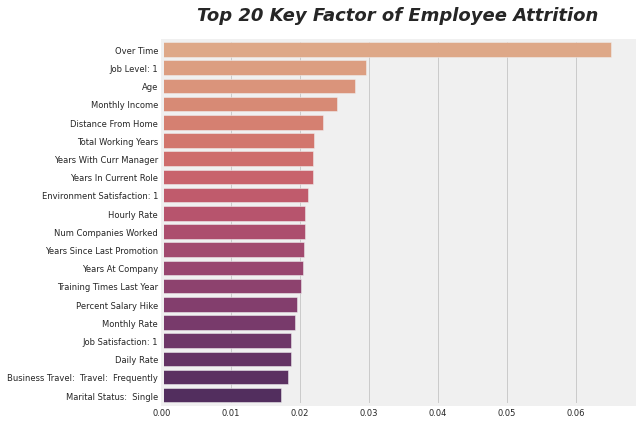

In [95]:
# set plot size
plt.figure(figsize = (9, 6))

# plotting the feature importances
data = feat_importances.sort_values(['Importance'], ascending = False).iloc[:20] # top 20
sns.barplot(y = 'Feature_Display', x = 'Importance', data = data, palette = 'flare')
plt.title('Top 20 Key Factor of Employee Attrition', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 20)
plt.xlabel('') # clear label
plt.ylabel('') # clear label

# plt.savefig(f"{gd_path}/gambar/feature-selection-importances.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/feature-selection-importances.png", bbox_inches = 'tight', dpi = 150)
plt.tight_layout()
plt.show()

Overtime sangat penting dalam pertimbangan attrition karyawan, sangat jauh berbeda dengan feature lainnya.

Kami akan membuat model untuk memprediksi attrition karyawan dengan feature yang memiliki skala feature importance lebih besar dari 0,02.

Serta ditambahkan feature:
- `Department_Sales`
- `Department_ResearchAndDevelopment`
- `Department_HumanResources`
- `JobSatisfaction_1`
- `RelationshipSatisfaction_1`

In [96]:
# filtering features
selected_features = list(feat_importances.loc[feat_importances['Importance'] >= 0.02]['Feature'])
add_features1 = ['Department_Sales', 'Department_Research & Development', 'Department_Human Resources', 'JobSatisfaction_1', 'RelationshipSatisfaction_1']
add_features2 = ['GroupAge_18-30', 'GroupAge_31-40', 'GroupAge_41-50', 'GroupAge_51-60', 'BelowMedIncome', 'GroupAge_Overtime', 'JobLevel_Overtime', 'JobLevel_BelowMedIncome_Overtime']

In [97]:
# data clean dan validation semua feature
df_clean_all = df_clean.copy()
df_valid_all = df_unseen.copy()

# data clean dan validation yang isinya feature importance > 0.02 dan tambahan feature kesepakatan kelompok
df_clean_selected = df_clean[['Attrition']].join(df_clean[selected_features + add_features1])
df_valid_selected = df_unseen[['Attrition']].join(df_unseen[selected_features + add_features1])

# data clean dan validation yang isinya feature importance > 0.02, tambahan feature kesepakatan kelompok, dan tambahan feature baru (group age, dll)
df_clean_selected_new = df_clean[['Attrition']].join(df_clean[selected_features + add_features1 + add_features2])
df_valid_selected_new = df_unseen[['Attrition']].join(df_unseen[selected_features + add_features1 + add_features2])

# Export Clean Dataset

In [98]:
# # simpan data yang sudah dibersihkan (siap dimodelkan)

# fname_all = 'dataset/data_clean_all.csv'
# fname_selected = 'dataset/data_clean_selected.csv'
# fname_selected_new = 'dataset/data_clean_selected_new.csv'

# fnames = [fname_all, fname_selected, fname_selected_new]
# df_export = [df_clean_all, df_clean_selected, df_clean_selected_new]

# for x_fname, y_df in zip(fnames, df_export):
#     fname = f"{gd_path}/{x_fname}"
#     y_df.to_csv(fname, index = False)

In [99]:
# # simpan unseen data

# fname_all = 'dataset/data_valid_all.csv'
# fname_selected = 'dataset/data_valid_selected.csv'
# fname_selected_new = 'dataset/data_valid_selected_new.csv'

# fnames = [fname_all, fname_selected, fname_selected_new]
# df_export = [df_valid_all, df_valid_selected, df_valid_selected_new]

# for x_fname, y_df in zip(fnames, df_export):
#     fname = f"{gd_path}/{x_fname}"
#     y_df.to_csv(fname, index = False)

# Modeling

## Initial

In [100]:
# classification report in dataframe
def class_report():
    
    # training score
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    
    # testing score
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    
    # create dataframe
    train_score = [train_accuracy, train_precision, train_recall, train_f1, train_auc]
    test_score = [test_accuracy, test_precision, test_recall, test_f1, test_auc]
    data = {'Training' : train_score, 'Testing' : test_score}
    index = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
    df_report = pd.DataFrame(data = data, index = index)
    df_report['Difference'] = df_report['Training'] - df_report['Testing']
    df_report['Average'] = (df_report['Training'] + df_report['Testing']) / 2
    
    return df_report

In [101]:
# # clean dataset
# df_clean1 = pd.read_csv(gd_path + 'data_clean_all.csv')
# df_clean2 = pd.read_csv(gd_path + 'data_clean_selected.csv')
# df_clean3 = pd.read_csv(gd_path + 'data_clean_selected_new.csv')

# # validation (unseen) dataset
# df_valid1 = pd.read_csv(gd_path + 'data_valid_all.csv')
# df_valid2 = pd.read_csv(gd_path + 'data_valid_selected.csv')
# df_valid3 = pd.read_csv(gd_path + 'data_valid_selected_new.csv')

In [102]:
# clean dataset
df_clean1 = df_clean_all.copy()
df_clean2 = df_clean_selected.copy()
df_clean3 = df_clean_selected_new.copy()

# validation (unseen) dataset
df_valid1 = df_valid_all.copy()
df_valid2 = df_valid_selected.copy()
df_valid3 = df_valid_selected_new.copy()

In [103]:
dfs_clean = [df_clean1, df_clean2, df_clean3]
for idx, val in enumerate(dfs_clean):
    print(f"The number of rows and columns of df_clean{idx+1} : {val.shape}")

dfs_valid = [df_valid1, df_valid2, df_valid3]
for idx, val in enumerate(dfs_valid):
    print(f"The number of rows and columns of df_valid{idx+1} : {val.shape}")

The number of rows and columns of df_clean1 : (2102, 84)
The number of rows and columns of df_clean2 : (2102, 20)
The number of rows and columns of df_clean3 : (2102, 28)
The number of rows and columns of df_valid1 : (139, 84)
The number of rows and columns of df_valid2 : (139, 20)
The number of rows and columns of df_valid3 : (139, 28)


- **Logistic Regression** : Hasna
- **K-Nearest Neighbor** : Faisal
- **Support Vector Machine** : Jehezkiel
- **Decision Tree** : Esa
- **Random Forest** : Anoga
- **XGBoost** : Danienta

## Dataset 1 (All Features)

### Train-Test Split

In [104]:
# training and testing data

x_feature = df_clean1.drop(['Attrition'], axis = 1).values # features
y_target = df_clean1['Attrition'].values # y_target

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = 0.3, random_state = 42) # 70:30

In [105]:
# validation data

x_valid = df_valid1.drop(['Attrition'], axis = 1).values # features
y_valid = df_valid1['Attrition'].values # target

### Logistic Regression

#### Default Parameter

In [106]:
lr = LogisticRegression(random_state = 42)
lr.fit(x_train, y_train)

# prediction
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 94.49% || Testing : 93.06%


#### Hyperparameter Tuning

In [107]:
# list of hyperparameters
params = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [1, 5, 7, 9],
    'solver' : ['liblinear'],
}

lr_tune = GridSearchCV(lr, params, cv = 5, scoring = 'f1')
lr_tune.fit(x_train, y_train)

# prediction
y_pred_train = lr_tune.predict(x_train)
y_pred_test = lr_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = lr_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 94.17% || Testing Score : 93.38%

Best Hyperparameter
C : 1 || penalty : l1 || solver : liblinear


#### Validation

In [108]:
# predict validation data
y_pred_valid = lr_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 60.38%


In [109]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

lr_report1 = pd.DataFrame(data, index = ['Logistic Regression (1)'])
lr_report1

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (1),0.848921,0.761905,0.5,0.603774,0.726636


### K-Nearest Neighbor

#### Deafault Parameter

In [110]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# prediction
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 89.11% || Testing : 84.59%


#### Hyperparameter Tuning

In [111]:
# list of hyperparameters
params = {
    'n_neighbors' : [2, 3, 5, 7, 9, 10, 11, 12, 15],
    'weights' : ['uniform'],
    'algorithm' : ['kd_tree', 'ball_tree', 'brute'],
    'p' : [1, 2],
}

knn_tune = GridSearchCV(knn, params, cv = 5, scoring = 'f1')
knn_tune.fit(x_train, y_train)

# prediction
y_pred_train = knn_tune.predict(x_train)
y_pred_test = knn_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = knn_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 99.87% || Testing Score : 92.59%

Best Hyperparameter
algorithm : kd_tree || n_neighbors : 2 || p : 2 || weights : uniform


#### Validation

In [112]:
# predict validation data
y_pred_valid = knn_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 38.36%


In [113]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

knn_report1 = pd.DataFrame(data, index = ['K-Nearest Neighbor (1)'])
knn_report1

,Accuracy,Precision,Recall,F1,AUC
K-Nearest Neighbor (1),0.676259,0.341463,0.4375,0.383562,0.592582


### Support Vector Machine

#### Default Parameter

In [114]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

# accuarcy score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# F1 Score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)

print("Accuracy (Default Parameter)")
print(f"Training : {acc_train:.2%} | Testing : {acc_test:.2%}")
print("F1 (Default Parameter)")
print(f"Training : {F1_train:.2%} | Testing : {F1_test:.2%}")

Accuracy (Default Parameter)
Training : 95.85% | Testing : 93.66%
F1 (Default Parameter)
Training : 95.77% | Testing : 93.06%


#### Hyperparameter Tuning

In [115]:
#list of hyperparameter

C = list(np.arange(0.1, 1)) # penggunaan angka 1 adalah default dan mencari mana yang terbaik dengan kemungkinan array
kernel = ['sigmoid']
cache_size = list(np.arange(10))
gamma = list(np.arange(0.1, 1))

params = dict(
    C = C,
    kernel = kernel,
    cache_size = cache_size,
    gamma = gamma
)

svm_parameter = GridSearchCV(svm, params, cv = 5, scoring = 'f1')
svm_parameter.fit(x_train, y_train)

# prediction
y_pred_train = svm_parameter.predict(x_train)
y_pred_test = svm_parameter.predict(x_test)

best = {}
for x in params.keys():
    best[x] = svm_parameter.best_estimator_.get_params()[x]
print(f"Best hyperparameter : {best}")

Best hyperparameter : {'C': 0.1, 'kernel': 'sigmoid', 'cache_size': 1, 'gamma': 0.1}


In [116]:
svm_train_report1 = class_report()
svm_train_report1

,Training,Testing,Difference,Average
Accuracy,0.874235,0.863708,0.010527,0.868972
Precision,0.888276,0.870307,0.017969,0.879292
Recall,0.860963,0.841584,0.019378,0.851273
F1,0.874406,0.855705,0.018701,0.865055
AUC,0.874465,0.862865,0.011599,0.868665


#### Validation

In [117]:
# predict validation data
y_pred_valid = svm_parameter.predict(x_valid)
acc_valid = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("Validation Score (Hyperparameter Tuning)")
print(f"Accuracy : {acc_valid:.2%}")
print(f"F1 : {f1_valid:.2%}")

Validation Score (Hyperparameter Tuning)
Accuracy : 79.14%
F1 : 53.97%


In [118]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

SVM_report1 = pd.DataFrame(data, index = ['Support Vector Machine (1)'])
SVM_report1

,Accuracy,Precision,Recall,F1,AUC
Support Vector Machine (1),0.791367,0.548387,0.53125,0.539683,0.700204


### Decision Tree

#### Default Parameter

In [119]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

# prediction
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 100.00% || Testing : 84.70%


#### Hyperparameter Tuning

In [120]:
# list of hyperparameters

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_tune = GridSearchCV(dt, params, cv = 5, scoring = 'f1')
dt_tune.fit(x_train, y_train)

# prediction
y_pred_train = dt_tune.predict(x_train)
y_pred_test = dt_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = dt_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 95.23% || Testing Score : 83.75%

Best Hyperparameter
criterion : entropy || max_depth : 20 || min_samples_leaf : 5


#### Validation

In [121]:
# predict validation data
y_pred_valid = dt_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 34.92%


In [122]:
# report validation data 

acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

dt_report1 = pd.DataFrame(data, index = ['Decision Tree (1)'])
dt_report1

,Accuracy,Precision,Recall,F1,AUC
Decision Tree (1),0.705036,0.354839,0.34375,0.349206,0.578417


### Random Forest

#### Default Parameter

In [123]:
RF = RandomForestClassifier(n_estimators = 10, random_state=42)
RF.fit(x_train, y_train)

# prediction
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 99.80% || Testing : 92.94%


#### Hyperparameter Tuning

In [124]:
# list of hyperparameters
params = {
     'criterion': ['gini','entropy'],
     'min_samples_leaf': [1,2,9],
     'min_samples_split': [30,50,70,130,131,132],
    'class_weight' : ['balanced_subsample']
}

RF_tune = RandomizedSearchCV(RF, params, cv = 5, scoring = 'f1', random_state = 42)
RF_tune.fit(x_train, y_train)

# prediction
y_pred_train = RF_tune.predict(x_train)
y_pred_test = RF_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = RF_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 92.77% || Testing Score : 88.78%

Best Hyperparameter
min_samples_split : 30 || min_samples_leaf : 9 || criterion : entropy || class_weight : balanced_subsample


#### Validation

In [125]:
# predict validation data
y_pred_valid = RF_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 48.39%


In [126]:
# report validation data 

acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

RF_report1 = pd.DataFrame(data, index = ['Random Forest (1)'])
RF_report1

,Accuracy,Precision,Recall,F1,AUC
Random Forest (1),0.769784,0.5,0.46875,0.483871,0.664282


### XGBoost

#### Default Parameter

In [127]:
# fit model no training data
model = XGBClassifier(random_state = 42, eval_metric = 'logloss')
model.fit(x_train, y_train)

#prediction
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 97.57% || Testing : 93.38%


#### Hyperparameter Tuning

In [128]:
# list of hyperparameters
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model_tune = RandomizedSearchCV(model, params, n_iter = 30, cv = 5, scoring = 'f1', random_state = 42)
model_tune.fit(x_train, y_train)

# prediction
y_pred_train = model_tune.predict(x_train)
y_pred_test = model_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = model_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 99.93% || Testing Score : 93.40%

Best Hyperparameter
subsample : 1.0 || min_child_weight : 1 || max_depth : 5 || gamma : 0.5 || colsample_bytree : 0.8


#### Validation

In [129]:
# predict validation data
y_pred_valid = model_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 49.06%


In [130]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

xgboost_report1 = pd.DataFrame(data, index = ['XGBoost (1)'])
xgboost_report1

,Accuracy,Precision,Recall,F1,AUC
XGBoost (1),0.805755,0.619048,0.40625,0.490566,0.665742


## Dataset 2 (Selected Features)

### Train-Test Split

In [131]:
# training and testing data

x_feature = df_clean2.drop(['Attrition'], axis = 1).values # features
y_target = df_clean2['Attrition'].values # y_target

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = 0.3, random_state = 42) # 70:30

In [132]:
# validation data

x_valid = df_valid2.drop(['Attrition'], axis = 1).values # features
y_valid = df_valid2['Attrition'].values # target

### Logistic Regression

#### Default Parameter

In [133]:
lr = LogisticRegression(random_state = 42)
lr.fit(x_train, y_train)

# prediction
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 74.68% || Testing : 72.42%


#### Hyperparameter Tuning

In [134]:
# list of hyperparameters
params = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [2, 0.2, 0.002, 0.0002],
    'solver' : ['liblinear'],
}

lr_tune = GridSearchCV(lr, params, cv = 5, scoring = 'f1')
lr_tune.fit(x_train, y_train)

# prediction
y_pred_train = lr_tune.predict(x_train)
y_pred_test = lr_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = lr_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 74.50% || Testing Score : 72.39%

Best Hyperparameter
C : 2 || penalty : l2 || solver : liblinear


#### Validation

In [135]:
# predict validation data
y_pred_valid = lr_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 49.44%


In [136]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

lr_report2 = pd.DataFrame(data, index = ['Logistic Regression (2)'])
lr_report2

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (2),0.676259,0.385965,0.6875,0.494382,0.680199


### K-Nearest Neighbor

#### Default Parameter

In [137]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# prediction
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 84.48% || Testing : 78.81%


#### Hyperparameter Tuning

In [138]:
# list of hyperparameters
params = {
    'n_neighbors' : [2, 3, 5, 7, 9, 10, 11, 12, 15],
    'weights' : ['uniform'],
    'algorithm' : ['kd_tree', 'ball_tree', 'brute'],
    'p' : [1, 2],
}

knn_tune = GridSearchCV(knn, params, cv = 5, scoring = 'f1')
knn_tune.fit(x_train, y_train)

# prediction
y_pred_train = knn_tune.predict(x_train)
y_pred_test = knn_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = knn_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 91.20% || Testing Score : 83.31%

Best Hyperparameter
algorithm : kd_tree || n_neighbors : 3 || p : 1 || weights : uniform


#### Validation

In [139]:
# predict validation data
y_pred_valid = knn_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 37.04%


In [140]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

knn_report2 = pd.DataFrame(data, index = ['K-Nearest Neighbor (2)'])
knn_report2

,Accuracy,Precision,Recall,F1,AUC
K-Nearest Neighbor (2),0.633094,0.306122,0.46875,0.37037,0.575496


### Support Vector Machine

#### Default Parameter

In [141]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

# accuarcy score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# F1 Score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)

print("Accuracy (Default Parameter)")
print(f"Training : {acc_train:.2%} | Testing : {acc_test:.2%}")
print("F1 (Default Parameter)")
print(f"Training : {F1_train:.2%} | Testing : {F1_test:.2%}")

Accuracy (Default Parameter)
Training : 82.05% | Testing : 80.35%
F1 (Default Parameter)
Training : 82.56% | Testing : 79.33%


#### Hyperparameter Tuning

In [142]:
#list of hyperparameter

C = list(np.arange(0.1, 1)) # penggunaan angka 1 adalah default dan mencari mana yang terbaik dengan kemungkinan array
kernel = ['sigmoid']
cache_size = list(np.arange(200,400,100))
gamma = list(np.arange(0.1, 1))
max_iter = list(np.arange(-1,0,1))

params = dict(
    C = C,
    kernel = kernel,
    cache_size = cache_size,
    gamma = gamma,
    max_iter = max_iter
)

svm_parameter = GridSearchCV(svm, params, cv = 5, scoring = 'f1')
svm_parameter.fit(x_train, y_train)

# prediction
y_pred_train = svm_parameter.predict(x_train)
y_pred_test = svm_parameter.predict(x_test)

best = {}
for x in params.keys():
    best[x] = svm_parameter.best_estimator_.get_params()[x]
print(f"Best hyperparameter : {best}")


Best hyperparameter : {'C': 0.1, 'kernel': 'sigmoid', 'cache_size': 200, 'gamma': 0.1, 'max_iter': -1}


In [143]:
svm_train_report2 = class_report()
svm_train_report2

,Training,Testing,Difference,Average
Accuracy,0.701564,0.700475,0.001088,0.701019
Precision,0.694830,0.682692,0.012137,0.688761
Recall,0.736631,0.702970,0.033661,0.719801
F1,0.715120,0.692683,0.022437,0.703901
AUC,0.700957,0.700571,0.000387,0.700764


#### Validation

In [144]:
# predict validation data
y_pred_valid = svm_parameter.predict(x_valid)
acc_valid = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("Validation Score (Hyperparameter Tuning)")
print(f"Accuracy : {acc_valid:.2%}")
print(f"F1 : {f1_valid:.2%}")

Validation Score (Hyperparameter Tuning)
Accuracy : 65.47%
F1 : 46.67%


In [145]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

SVM_report2 = pd.DataFrame(data, index = ['Support Vector Machine (2)'])
SVM_report2

,Accuracy,Precision,Recall,F1,AUC
Support Vector Machine (2),0.654676,0.362069,0.65625,0.466667,0.655228


### Decision Tree

#### Default Parameter

In [146]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

# prediction
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 100.00% || Testing : 82.02%


#### Hyperparameter Tuning

In [147]:
# list of hyperparameters

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_tune = GridSearchCV(dt, params, cv = 5, scoring = 'f1')
dt_tune.fit(x_train, y_train)

# prediction
y_pred_train = dt_tune.predict(x_train)
y_pred_test = dt_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = dt_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 94.02% || Testing Score : 84.28%

Best Hyperparameter
criterion : entropy || max_depth : 20 || min_samples_leaf : 5


#### Validation

In [148]:
# predict validation data
y_pred_valid = dt_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 31.58%


In [149]:
# report validation data 

acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

dt_report2 = pd.DataFrame(data, index = ['Decision Tree (2)'])
dt_report2

,Accuracy,Precision,Recall,F1,AUC
Decision Tree (2),0.719424,0.36,0.28125,0.315789,0.565859


### Random Forest

#### Default Parameter

In [150]:
RF = RandomForestClassifier(n_estimators = 10, random_state=42)
RF.fit(x_train, y_train)

# prediction
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 99.53% || Testing : 87.57%


#### Hyperparameter Tuning

In [151]:
# list of hyperparameters
params = {
      'criterion': ['gini','entropy'],
     'min_samples_leaf': [1,2,3,4,9,91],
     'min_samples_split': [55,102,153,232],
    'class_weight' : ['balanced_subsample']
}

RF_tune = RandomizedSearchCV(RF, params, cv = 5, scoring = 'f1', random_state = 42)
RF_tune.fit(x_train, y_train)

# prediction
y_pred_train = RF_tune.predict(x_train)
y_pred_test = RF_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = RF_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 89.02% || Testing Score : 86.34%

Best Hyperparameter
min_samples_split : 55 || min_samples_leaf : 1 || criterion : entropy || class_weight : balanced_subsample


#### Validation

In [152]:
# predict validation data
y_pred_valid = RF_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 40.00%


In [153]:
# report validation data 

acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

RF_report2 = pd.DataFrame(data, index = ['Random Forest (2)'])
RF_report2

,Accuracy,Precision,Recall,F1,AUC
Random Forest (2),0.741007,0.428571,0.375,0.4,0.612734


### XGBoost

#### Default Parameter

In [154]:
# fit model no training data
model = XGBClassifier(random_state = 42, eval_metric = 'logloss')
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
f1_test = f1_score(y_test, predictions)

# make predictions for train data
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
f1_train = f1_score(y_train, predictions)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 94.92% || Testing : 91.19%


#### Hyperparameter Tuning

In [155]:
# list of hyperparameters
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model_tune = RandomizedSearchCV(model, params, n_iter = 30, cv = 5, scoring = 'f1', random_state = 42)
model_tune.fit(x_train, y_train)

# prediction
y_pred_train = model_tune.predict(x_train)
y_pred_test = model_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = model_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 98.11% || Testing Score : 92.57%

Best Hyperparameter
subsample : 1.0 || min_child_weight : 1 || max_depth : 5 || gamma : 1.5 || colsample_bytree : 0.8


#### Validation

In [156]:
# predict validation data
y_pred_valid = model_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 25.53%


In [157]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

xgboost_report2 = pd.DataFrame(data, index = ['XGBoost (2)'])
xgboost_report2

,Accuracy,Precision,Recall,F1,AUC
XGBoost (2),0.748201,0.4,0.1875,0.255319,0.551694


## Dataset 3 (Selected + New Features)

### Train-Test Split

In [158]:
# training and testing data

x_feature = df_clean3.drop(['Attrition'], axis = 1).values # features
y_target = df_clean3['Attrition'].values # y_target

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = 0.3, random_state = 42) # 70:30

In [159]:
# validation data

x_valid = df_valid3.drop(['Attrition'], axis = 1).values # features
y_valid = df_valid3['Attrition'].values # target

### Logistic Regression

#### Default Parameter

In [160]:
lr = LogisticRegression(random_state = 42)
lr.fit(x_train, y_train)

# prediction
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 76.07% || Testing : 77.36%


#### Hyperparameter Tuning

In [161]:
# list of hyperparameters
params = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.05],
    'solver' : ['liblinear'],
}

lr_tune = GridSearchCV(lr, params, cv = 5, scoring = 'f1')
lr_tune.fit(x_train, y_train)

# prediction
y_pred_train = lr_tune.predict(x_train)
y_pred_test = lr_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = lr_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 73.31% || Testing Score : 72.14%

Best Hyperparameter
C : 0.05 || penalty : l2 || solver : liblinear


#### Validation

In [162]:
# predict validation data
y_pred_valid = lr_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 51.28%


In [163]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

lr_report3 = pd.DataFrame(data, index = ['Logistic Regression (3)'])
lr_report3

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (3),0.726619,0.434783,0.625,0.512821,0.691005


### K-Nearest Neighbor

#### Default Parameter

In [164]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# prediction
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 86.98% || Testing : 81.75%


#### Hyperparameter Tuning

In [165]:
# list of hyperparameters
params = {
    'n_neighbors' : [2, 3, 5, 7, 9, 10, 11, 12, 15],
    'weights' : ['uniform'],
    'algorithm' : ['kd_tree', 'ball_tree', 'brute'],
    'p' : [1, 2],
}

knn_tune = GridSearchCV(knn, params, cv = 5, scoring = 'f1')
knn_tune.fit(x_train, y_train)

# prediction
y_pred_train = knn_tune.predict(x_train)
y_pred_test = knn_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = knn_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 91.41% || Testing Score : 85.46%

Best Hyperparameter
algorithm : kd_tree || n_neighbors : 3 || p : 1 || weights : uniform


#### Validation

In [166]:
# predict validation data
y_pred_valid = knn_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 41.46%


In [167]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

knn_report3 = pd.DataFrame(data, index = ['K-Nearest Neighbor (3)'])
knn_report3

,Accuracy,Precision,Recall,F1,AUC
K-Nearest Neighbor (3),0.654676,0.34,0.53125,0.414634,0.611419


### Support Vector Machine

#### Default Parameter

In [168]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

# accuarcy score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# F1 Score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)

print("Accuracy (Default Parameter)")
print(f"Training : {acc_train:.2%} | Testing : {acc_test:.2%}")
print("F1 (Default Parameter)")
print(f"Training : {F1_train:.2%} | Testing : {F1_test:.2%}")

Accuracy (Default Parameter)
Training : 84.30% | Testing : 82.73%
F1 (Default Parameter)
Training : 84.55% | Testing : 82.10%


#### Hyperparameter Tuning

In [169]:
#list of hyperparameter

C = list(np.arange(0.1, 1)) # penggunaan angka 1 adalah default dan mencari mana yang terbaik dengan kemungkinan array
kernel = ['sigmoid']
cache_size = list(np.arange(200,400,100))
gamma = list(np.arange(0.1, 1))
max_iter = list(np.arange(-1,0,1))

params = dict(
    C = C,
    kernel = kernel,
    cache_size = cache_size,
    gamma = gamma,
    max_iter = max_iter
)

svm_parameter = GridSearchCV(svm, params, cv = 5, scoring = 'f1')
svm_parameter.fit(x_train, y_train)

# prediction
y_pred_train = svm_parameter.predict(x_train)
y_pred_test = svm_parameter.predict(x_test)

best = {}
for x in params.keys():
    best[x] = svm_parameter.best_estimator_.get_params()[x]
print(f"Best hyperparameter : {best}")

Best hyperparameter : {'C': 0.1, 'kernel': 'sigmoid', 'cache_size': 200, 'gamma': 0.1, 'max_iter': -1}


In [170]:
svm_train_report3 = class_report()
svm_train_report3

,Training,Testing,Difference,Average
Accuracy,0.715840,0.719493,-0.003653,0.717666
Precision,0.737752,0.714286,0.023466,0.726019
Recall,0.684492,0.693069,-0.008577,0.688781
F1,0.710125,0.703518,0.006607,0.706821
AUC,0.716382,0.718486,-0.002104,0.717434


#### Validation

In [171]:
# predict validation data
y_pred_valid = svm_parameter.predict(x_valid)
acc_valid = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("Validation Score (Hyperparameter Tuning)")
print(f"Accuracy : {acc_valid:.2%}")
print(f"F1 : {f1_valid:.2%}")

Validation Score (Hyperparameter Tuning)
Accuracy : 68.35%
F1 : 47.62%


In [172]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

SVM_report3 = pd.DataFrame(data, index = ['Support Vector Machine (3)'])
SVM_report3

,Accuracy,Precision,Recall,F1,AUC
Support Vector Machine (3),0.683453,0.384615,0.625,0.47619,0.662967


### Decision Tree

#### Default Parameter

In [173]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

# prediction
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 100.00% || Testing : 80.98%


#### Hyperparameter Tuning

In [174]:
# list of hyperparameters

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_tune = GridSearchCV(dt, params, cv = 5, scoring = 'f1')
dt_tune.fit(x_train, y_train)

# prediction
y_pred_train = dt_tune.predict(x_train)
y_pred_test = dt_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = dt_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 93.62% || Testing Score : 86.49%

Best Hyperparameter
criterion : entropy || max_depth : 20 || min_samples_leaf : 5


#### Validation

In [175]:
# predict validation data
y_pred_valid = dt_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 22.22%


In [176]:
# report validation data 

acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

dt_report3 = pd.DataFrame(data, index = ['Decision Tree (3)'])
dt_report3

,Accuracy,Precision,Recall,F1,AUC
Decision Tree (3),0.697842,0.272727,0.1875,0.222222,0.518984


### Random Forest

#### Default Parameter

In [177]:
RF = RandomForestClassifier(n_estimators = 10, random_state=42)
RF.fit(x_train, y_train)

# prediction
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 99.73% || Testing : 88.08%


#### Hyperparameter Tuning

In [178]:
# list of hyperparameters
params = {
      'criterion': ['gini','entropy'],
     'min_samples_leaf': [1,2,3,4,9,91],
     'min_samples_split': [55,102,153,232],
    'class_weight' : ['balanced_subsample']
}

RF_tune = RandomizedSearchCV(RF, params, cv = 5, scoring = 'f1', random_state = 42)
RF_tune.fit(x_train, y_train)

# prediction
y_pred_train = RF_tune.predict(x_train)
y_pred_test = RF_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = RF_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 88.37% || Testing Score : 84.68%

Best Hyperparameter
min_samples_split : 55 || min_samples_leaf : 1 || criterion : entropy || class_weight : balanced_subsample


#### Validation

In [179]:
# predict validation data
y_pred_valid = RF_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 44.83%


In [180]:
# report validation data 

acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

RF_report3 = pd.DataFrame(data, index = ['Random Forest (3)'])
RF_report3

,Accuracy,Precision,Recall,F1,AUC
Random Forest (3),0.769784,0.5,0.40625,0.448276,0.642377


### XGBoost

#### Default Parameter

In [181]:
# fit model no training data
model = XGBClassifier(random_state = 42, eval_metric = 'logloss')
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
f1_test = f1_score(y_test, predictions)

# make predictions for train data
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
f1_train = f1_score(y_train, predictions)

print("F1 Score (Default Parameter)")
print("============================")
print(f"Training : {f1_train:.2%} || Testing : {f1_test:.2%}")

F1 Score (Default Parameter)
Training : 94.79% || Testing : 91.31%


#### Hyperparameter Tuning

In [182]:
# list of hyperparameters
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model_tune = RandomizedSearchCV(model, params, n_iter = 30, cv = 5, scoring = 'f1', random_state = 42)
model_tune.fit(x_train, y_train)

# prediction
y_pred_train = model_tune.predict(x_train)
y_pred_test = model_tune.predict(x_test)

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Training Score : {f1_train:.2%} || Testing Score : {f1_test:.2%}")
print("")

# get best parameter
best = model_tune.best_params_

print("Best Hyperparameter")
print("===================")
for key, val in best.items():
    if key == list(best.keys())[-1]:
        print(f"{key} : {val}")
    else:
        print(f"{key} : {val}", end = ' || ')

F1 Score (Hyperparameter Tuning)
Training Score : 98.79% || Testing Score : 92.41%

Best Hyperparameter
subsample : 1.0 || min_child_weight : 1 || max_depth : 5 || gamma : 0.5 || colsample_bytree : 0.8


#### Validation

In [183]:
# predict validation data
y_pred_valid = model_tune.predict(x_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

print("F1 Score (Hyperparameter Tuning)")
print("================================")
print(f"Validation : {f1_valid:.2%}")

F1 Score (Hyperparameter Tuning)
Validation : 23.26%


In [184]:
acc_valid = accuracy_score(y_valid, y_pred_valid)
prec_valid = precision_score(y_valid, y_pred_valid)
rec_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
auc_valid = roc_auc_score(y_valid, y_pred_valid)

data = columns = {'Accuracy' : acc_valid, 'Precision' : prec_valid, 'Recall' : rec_valid, 'F1' : f1_valid, 'AUC' : auc_valid}

xgboost_report3 = pd.DataFrame(data, index = ['XGBoost (3)'])
xgboost_report3

,Accuracy,Precision,Recall,F1,AUC
XGBoost (3),0.76259,0.454545,0.15625,0.232558,0.550088


# Evaluation

## Dataset 1

In [185]:
model_report1 = pd.DataFrame()
report = [
    lr_report1,
    knn_report1,
    SVM_report1,
    dt_report1,
    RF_report1,
    xgboost_report1,
]

for rx in report:
    model_report1 = model_report1.append(rx)

model_report1 = model_report1.sort_values('F1', ascending = False)
model_report1

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (1),0.848921,0.761905,0.50000,0.603774,0.726636
Support Vector Machine (1),0.791367,0.548387,0.53125,0.539683,0.700204
XGBoost (1),0.805755,0.619048,0.40625,0.490566,0.665742
Random Forest (1),0.769784,0.500000,0.46875,0.483871,0.664282
K-Nearest Neighbor (1),0.676259,0.341463,0.43750,0.383562,0.592582
Decision Tree (1),0.705036,0.354839,0.34375,0.349206,0.578417


## Dataset 2

In [186]:
model_report2 = pd.DataFrame()
report = [
    lr_report2,
    knn_report2,
    SVM_report2,
    dt_report2,
    RF_report2,
    xgboost_report2,
]

for rx in report:
    model_report2 = model_report2.append(rx)

model_report2 = model_report2.sort_values('F1', ascending = False)
model_report2

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (2),0.676259,0.385965,0.68750,0.494382,0.680199
Support Vector Machine (2),0.654676,0.362069,0.65625,0.466667,0.655228
Random Forest (2),0.741007,0.428571,0.37500,0.400000,0.612734
K-Nearest Neighbor (2),0.633094,0.306122,0.46875,0.370370,0.575496
Decision Tree (2),0.719424,0.360000,0.28125,0.315789,0.565859
XGBoost (2),0.748201,0.400000,0.18750,0.255319,0.551694


## Dataset 3

In [187]:
model_report3 = pd.DataFrame()
report = [
    lr_report3,
    knn_report3,
    SVM_report3,
    dt_report3,
    RF_report3,
    xgboost_report3,
]

for rx in report:
    model_report3 = model_report3.append(rx)

model_report3 = model_report3.sort_values('F1', ascending = False)
model_report3

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (3),0.726619,0.434783,0.62500,0.512821,0.691005
Support Vector Machine (3),0.683453,0.384615,0.62500,0.476190,0.662967
Random Forest (3),0.769784,0.500000,0.40625,0.448276,0.642377
K-Nearest Neighbor (3),0.654676,0.340000,0.53125,0.414634,0.611419
XGBoost (3),0.762590,0.454545,0.15625,0.232558,0.550088
Decision Tree (3),0.697842,0.272727,0.18750,0.222222,0.518984


## Combined

In [188]:
model_report = pd.DataFrame()
report = [model_report1, model_report2, model_report3]

for rx in report:
    model_report = model_report.append(rx)

model_report = model_report.sort_values('F1', ascending = False)
model_report

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression (1),0.848921,0.761905,0.50000,0.603774,0.726636
Support Vector Machine (1),0.791367,0.548387,0.53125,0.539683,0.700204
Logistic Regression (3),0.726619,0.434783,0.62500,0.512821,0.691005
Logistic Regression (2),0.676259,0.385965,0.68750,0.494382,0.680199
XGBoost (1),0.805755,0.619048,0.40625,0.490566,0.665742
Random Forest (1),0.769784,0.500000,0.46875,0.483871,0.664282
Support Vector Machine (3),0.683453,0.384615,0.62500,0.476190,0.662967
Support Vector Machine (2),0.654676,0.362069,0.65625,0.466667,0.655228
Random Forest (3),0.769784,0.500000,0.40625,0.448276,0.642377
K-Nearest Neighbor (3),0.654676,0.340000,0.53125,0.414634,0.611419


Dari tabel perbandingan di atas, ditemukan bahwa **Logistic Regression** merupakan algoritma terbaik dengan F1 score tertinggi, yaitu 0.604.

## Final Training Model

Melakukan training model menggunakan algoritma logistic regression dengan skenario dataset 1 (all features).

In [189]:
# training and testing data

x_feature = df_clean1.drop(['Attrition'], axis = 1) # features
y_target = df_clean1['Attrition'].values # y_target

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = 0.3, random_state = 42) # 70:30

In [190]:
# validation data

x_valid = df_valid1.drop(['Attrition'], axis = 1) # features
y_valid = df_valid1['Attrition'].values # target

In [191]:
lr = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', random_state = 42)
lr.fit(x_train, y_train)

# prediction
y_pred_valid = lr.predict(x_valid)

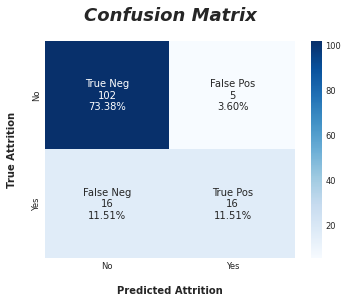

In [192]:
# confusion matrix

matrix = confusion_matrix(y_valid, y_pred_valid)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(x) for x in matrix.flatten()]
group_percentages = ["{0:.2%}".format(x) for x in matrix.flatten() / np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# visualisasi
plt.figure(figsize = (5, 4))
sns.heatmap(matrix, annot = labels, fmt = '', cmap = 'Blues')
plt.xlabel('Predicted Attrition', fontweight = 'bold', labelpad = 15)
plt.ylabel('True Attrition', fontweight = 'bold', labelpad = 15)
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.title('Confusion Matrix', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 20)
# plt.savefig(f"{gd_path}/gambar/confsmetrix.png", bbox_inches = 'tight', dpi = 150, transparent = True)
plt.show()

In [193]:
# nilai coefficient setiap feature (menandakan seberapa besar chance untuk memprediksi label)

df_coef = pd.DataFrame(columns = ['Feature', 'Coefficient'])
for feat, coef in zip(lr.feature_names_in_, lr.coef_[0]):
    df_coef = df_coef.append(pd.DataFrame({'Feature' : feat, 'Coefficient' : coef}, columns = ['Feature', 'Coefficient'], index = [0]), ignore_index = True)

df_coef['Abs_Coefficient'] = abs(df_coef['Coefficient'])
df_coef = df_coef.sort_values('Coefficient', ascending = False).reset_index(drop = True)
# df_coef.iloc[0:10] # top 10
df_coef

,Feature,Coefficient,Abs_Coefficient
0,NumCompaniesWorked,1.614684,1.614684
1,OverTime,1.434964,1.434964
2,DistanceFromHome,1.400893,1.400893
3,YearsSinceLastPromotion,0.926319,0.926319
4,JobLevel_Overtime,0.712349,0.712349
...,...,...,...
78,EnvironmentSatisfaction_2,-2.022922,2.022922
79,JobRole_Research Director,-2.216978,2.216978
80,JobSatisfaction_3,-2.344417,2.344417
81,JobSatisfaction_2,-2.493124,2.493124


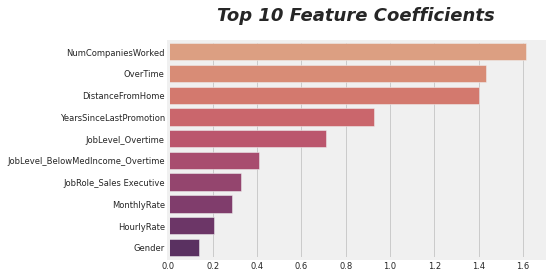

In [194]:
# set plot size
plt.figure(figsize = (6, 4))

# plotting the feature coefficients
sns.barplot(y = 'Feature', x = 'Coefficient', data = df_coef.iloc[0:10], palette = 'flare')
plt.title('Top 10 Feature Coefficients', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 20)
plt.xlabel('') # clear label
plt.ylabel('') # clear label

# plt.savefig(f"{gd_path}/gambar/coef_top10.png", bbox_inches = 'tight', dpi = 150, transparent = True)
plt.show()

# Simulation

**Simulasi bisnis untuk menurunkan tingkat turnover.**

## Initial

In [204]:
# load dataset
df_sim = df_raw.copy()
df_sim = df_sim.drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1)
# df_sim = pd.read_csv(f"{gd_path}/WA_Fn-UseC_-HR-Employee-Attrition.csv").drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1)
df_sim.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [205]:
df_sim.shape

(1470, 30)

In [206]:
def feature_engineering(df):

    # create feature: group age
    df['GroupAge'] = np.where(df['Age'] <= 30, '18-30', np.where((df['Age'] > 30) & (df['Age'] <= 40), '31-40', np.where((df['Age'] > 40) & (df['Age'] <= 50), '41-50', '51-60')))
    
    # create feature: median monthly income per job level (below == 1, above == 0)
    MedIncome = df.groupby(['JobLevel'])['MonthlyIncome'].median()
    df['BelowMedIncome'] = df['JobLevel'].apply(lambda x: MedIncome[x])
    df['BelowMedIncome'] = np.where(df['MonthlyIncome'] < df['BelowMedIncome'], 1, 0)
    
    # create feature: group age (18-30) & overtime (yes)
    df['GroupAge_Overtime'] = np.where((df['GroupAge'] == '18-30') & (df['OverTime'] == 'Yes'), 1, 0)

    # create feature: job level (1) & overtime (yes)
    df['JobLevel_Overtime'] = np.where((df['JobLevel'] == 1) & (df['OverTime'] == 'Yes'), 1, 0)

    # create feature: job level (1) & below median monthly income (1) & overtime (yes)
    df['JobLevel_BelowMedIncome_Overtime'] = np.where((df['JobLevel'] == 1) & (df['BelowMedIncome'] == 1) & (df['OverTime'] == 'Yes'), 1, 0)
    
    # standardization scaling
    std_cols = ['Age']
    for col in std_cols:
        x = df[col].values.reshape(len(df), 1)
        scaler = StandardScaler()
        scaler.fit(x)
        x_scaled = scaler.transform(x)
        df[col] = x_scaled

    # normalization scaling
    nrm_cols = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
    for col in nrm_cols:
        x = df[col].values.reshape(len(df), 1)
        scaler = MinMaxScaler()
        scaler.fit(x)
        x_scaled = scaler.transform(x)
        df[col] = x_scaled
    
    # traditional labeling
    df['OverTime'] = df['OverTime'].map({'No' : 0, 'Yes' : 1})
    df['Gender'] = df['Gender'].map({'Female' : 0, 'Male' : 1})
    df['PerformanceRating'] = df['PerformanceRating'].map({3 : 0, 4 : 1}) # only consist of 2 unique values

    # one-hot encoding
    onehot_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'GroupAge']
    for col in onehot_cols:
        onehot = pd.get_dummies(df[col], prefix = col)
        dummies_cols = list(onehot.columns)
        df = df.join(onehot)
    df = df.drop(onehot_cols, axis = 1)
    
    return df

In [207]:
def plot_target(df):
    
    data = df.groupby(['Attrition']).size().reset_index().rename({0 : 'Size'}, axis = 1)
    data['Attrition'] = data['Attrition'].map({0 : 'No', 1 : 'Yes'})

    # plot attrition
    plt.figure(figsize = (2, 3))
    sns.barplot(x = 'Attrition', y = 'Size', data = data, palette = ['#ccc5b9', '#e71d36'])
    x = 0
    for y in data['Size']:
        s = f"{y / data['Size'].sum():.2%}"
        plt.text(x = x, y = y + 50, s = s, fontsize = 12, ha = 'center')
        x += 1
    plt.ylim(0, 1500)
    plt.xlabel('')
    plt.ylabel('Num of Employees', fontweight = 'bold', labelpad = 10)
    plt.title('Attrition', fontstyle = 'italic', fontweight = 'bold', fontsize = 18, pad = 15)
    plt.show()

## Before Treatment

Memprediksi karyawan yang berpotensi meninggalkan perusahaan agar selanjutnya dapat dilakukan beberapa treatment.

In [208]:
df_bef = df_sim.copy()
df_bef = feature_engineering(df_bef)
df_bef.head(2)

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BelowMedIncome,GroupAge_Overtime,JobLevel_Overtime,JobLevel_BelowMedIncome_Overtime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,GroupAge_18-30,GroupAge_31-40,GroupAge_41-50,GroupAge_51-60
0,0.446350,0.71582,0.00,0,0.914286,0.262454,0.698053,0.888889,1,0.000000,0,0.20,0.0,0.15,0.222222,0.000000,0.294118,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1.322365,0.12670,0.25,1,0.442857,0.217009,0.916001,0.111111,0,0.857143,1,0.25,0.5,0.25,0.388889,0.066667,0.411765,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [209]:
df_bef.shape

(1470, 83)

In [210]:
# predict
attrition = lr.predict(df_bef)

df_bef['Attrition'] = attrition
df_bef.head(2)

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BelowMedIncome,GroupAge_Overtime,JobLevel_Overtime,JobLevel_BelowMedIncome_Overtime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,GroupAge_18-30,GroupAge_31-40,GroupAge_41-50,GroupAge_51-60,Attrition
0,0.446350,0.71582,0.00,0,0.914286,0.262454,0.698053,0.888889,1,0.000000,0,0.20,0.0,0.15,0.222222,0.000000,0.294118,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,1.322365,0.12670,0.25,1,0.442857,0.217009,0.916001,0.111111,0,0.857143,1,0.25,0.5,0.25,0.388889,0.066667,0.411765,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [211]:
df_bef.groupby(['Attrition']).size()

Attrition
0    1280
1     190
dtype: int64

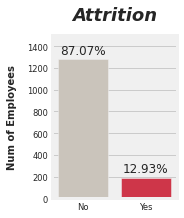

In [212]:
plot_target(df_bef)

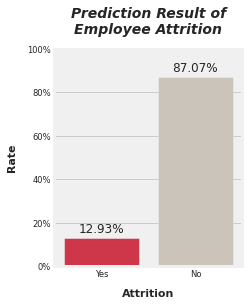

In [213]:
data = df_bef.groupby(['Attrition']).size().reset_index().rename({0 : 'Size'}, axis = 1).sort_values('Attrition', ascending = False)
data['Attrition'] = data['Attrition'].map({0 : 'No', 1 : 'Yes'})
data['Percentage'] = data['Size'].apply(lambda x: x / data['Size'].sum())

# plot attrition
plt.figure(figsize = (3, 4))
sns.barplot(x = 'Attrition', y = 'Percentage', data = data, palette = ['#e71d36', '#ccc5b9'])
x = 0
for y in data['Percentage']:
    s = f"{y:.2%}"
    plt.text(x = x, y = y + 0.025, s = s, fontsize = 12, ha = 'center')
    x += 1
plt.ylim(0, 1)
yticks = list(np.arange(0, 1.1, 0.2))
yticks_pct = []
for i in yticks:
    yticks_pct.append("{:.0%}".format(i))
plt.yticks(yticks, yticks_pct)
plt.xlabel('Attrition', fontweight = 'bold', fontsize = 11, labelpad = 10)
plt.ylabel('Rate', fontweight = 'bold', fontsize = 11, labelpad = 10)
plt.title('Prediction Result of\nEmployee Attrition', fontstyle = 'italic', fontweight = 'bold', fontsize = 14, pad = 15)
# plt.savefig(f"{gd_path}predict_result.png", bbox_inches = 'tight', dpi = 150, transparent = True)
plt.show()

Dengan bantuan ML, dihasilkan kemungkinan karyawan yang berpotensi untuk meninggalkan perusahaan sejumlah 190 dari 1470 orang (12.93%). Diasumsikan bahwa sebelumnya tidak mengetahui kebenarannya.

Menindaklanjuti hasil prediksi, kami merekomendasikan stakeholders untuk melakukan treatment kepada karyawan berdasarkan feature dengan nilai coefficient yang tinggi (*lihat grafik Top 10 Feature Coefficients*). Kami memprioritaskan beberapa atributnya yaitu **Overtime** dan **Years Since Last Promotion**.

Perhatikan karyawan yang diprediksi berpotensi meninggalkan perusahaan,
- apakah ada karyawan dengan performance rating di atas rata-rata (excellent dan outstanding) yang artinya layak dipromosikan, namun sudah bertahun-tahun tidak mendapatkan promosi?
- apakah ada karyawan yang lembur (overtime), namun memiliki keterlibatan kerja (job involvement) yang rendah?

## After Treatment

Mencoba melakukan beberapa treatment kepada karyawan yang berpotensi meninggalkan perusahaan dari hasil prediksi.

In [214]:
df_aft = df_sim.copy()
df_aft['Attrition_Pred'] = attrition
df_aft.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Pred
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0


In [215]:
df_aft.shape

(1470, 31)

Pada kasus ini kami mencoba untuk memberikan promosi kepada beberapa karyawan yang sudah layak dipromosikan dengan melakukan filtering sebagai berikut:
- Predicted attrition = Yes
- Performance rating >= 3 (excellent dan outstanding)
- Years since last promotion >= 2 (terakhir dipromosikan di atas sama dengan 2 tahun)

Perubahan yang dilakukan yaitu:
- Menambahkan satu tingkat job level, contoh: dari 1 ke 2, 2 ke 3, dst.
- Mengubah atribut years since last promotion menjadi 0

In [216]:
# filtering
ft_attrition = (df_aft['Attrition_Pred'] == 1)
ft_performance = (df_aft['PerformanceRating'] >= 3)
ft_promotion = (df_aft['YearsSinceLastPromotion'] >= 2)
filtering = ft_attrition & ft_performance & ft_promotion
# filtering = ft_performance & ft_promotion

df_aft[['PerformanceRating', 'YearsSinceLastPromotion', 'JobLevel']].loc[filtering]

,PerformanceRating,YearsSinceLastPromotion,JobLevel
26,4,6,1
51,3,2,1
63,3,7,3
110,4,12,3
122,3,4,1
124,3,7,2
323,3,2,1
354,3,2,2
427,3,13,3
514,3,9,1


In [217]:
# transformasi nilai
df_aft['JobLevel'] = np.where(filtering, df_aft['JobLevel']+1, df_aft['JobLevel'])
df_aft['YearsSinceLastPromotion'] = np.where(filtering, 0, df_aft['YearsSinceLastPromotion'])

df_aft[['PerformanceRating', 'YearsSinceLastPromotion', 'JobLevel']].loc[filtering]

,PerformanceRating,YearsSinceLastPromotion,JobLevel
26,4,0,2
51,3,0,2
63,3,0,4
110,4,0,4
122,3,0,2
124,3,0,3
323,3,0,2
354,3,0,3
427,3,0,4
514,3,0,2


Pada kasus ini kami mencoba untuk menaikkan 1 tingkat job involvment dengan melakukan filtering sebagai berikut:
- Predicted attrition = Yes
- Job involvement <= 3
- Overtime = Yes

Perubahan yang dilakukan yaitu:
- Menambahkan satu tingkat job involvement, contoh: dari 1 ke 2, 2 ke 3, dst.

In [218]:
# filtering
ft_attrition = (df_aft['Attrition_Pred'] == 1)
ft_involvement = (df_aft['JobInvolvement'] <= 3)
ft_overtime = (df_aft['OverTime'] == 'Yes')
filtering = ft_attrition & ft_involvement & ft_overtime

df_aft[['JobInvolvement', 'OverTime']].loc[filtering]

,JobInvolvement,OverTime
0,3,Yes
2,2,Yes
14,2,Yes
26,1,Yes
36,2,Yes
...,...,...
1395,3,Yes
1396,3,Yes
1436,3,Yes
1442,3,Yes


In [219]:
# transformasi nilai
df_aft['JobInvolvement'] = np.where(filtering, df_aft['JobInvolvement']+1, df_aft['JobInvolvement'])

df_aft[['JobInvolvement', 'OverTime']].loc[filtering]

,JobInvolvement,OverTime
0,4,Yes
2,3,Yes
14,3,Yes
26,2,Yes
36,3,Yes
...,...,...
1395,4,Yes
1396,4,Yes
1436,4,Yes
1442,4,Yes


In [220]:
df_aft = df_aft.drop(['Attrition_Pred'], axis = 1)
df_aft.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,4,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [221]:
df_aft = feature_engineering(df_aft)
df_aft.head(2)

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BelowMedIncome,GroupAge_Overtime,JobLevel_Overtime,JobLevel_BelowMedIncome_Overtime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,GroupAge_18-30,GroupAge_31-40,GroupAge_41-50,GroupAge_51-60
0,0.446350,0.71582,0.00,0,0.914286,0.262454,0.698053,0.888889,1,0.000000,0,0.20,0.0,0.15,0.222222,0.000000,0.294118,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1.322365,0.12670,0.25,1,0.442857,0.217009,0.916001,0.111111,0,0.857143,1,0.25,0.5,0.25,0.388889,0.066667,0.411765,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [222]:
df_aft.shape

(1470, 83)

In [223]:
# predict
attrition = lr.predict(df_aft)

df_aft['Attrition'] = attrition
df_aft.head(2)

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BelowMedIncome,GroupAge_Overtime,JobLevel_Overtime,JobLevel_BelowMedIncome_Overtime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,GroupAge_18-30,GroupAge_31-40,GroupAge_41-50,GroupAge_51-60,Attrition
0,0.446350,0.71582,0.00,0,0.914286,0.262454,0.698053,0.888889,1,0.000000,0,0.20,0.0,0.15,0.222222,0.000000,0.294118,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,1.322365,0.12670,0.25,1,0.442857,0.217009,0.916001,0.111111,0,0.857143,1,0.25,0.5,0.25,0.388889,0.066667,0.411765,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [224]:
df_aft.groupby(['Attrition']).size()

Attrition
0    1327
1     143
dtype: int64

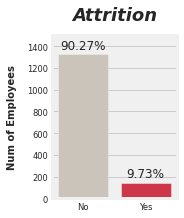

In [225]:
plot_target(df_aft)

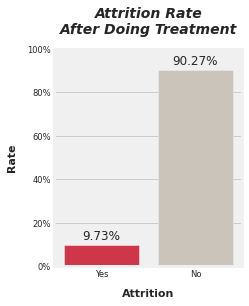

In [226]:
data = df_aft.groupby(['Attrition']).size().reset_index().rename({0 : 'Size'}, axis = 1).sort_values('Attrition', ascending = False)
data['Attrition'] = data['Attrition'].map({0 : 'No', 1 : 'Yes'})
data['Percentage'] = data['Size'].apply(lambda x: x / data['Size'].sum())

# plot attrition
plt.figure(figsize = (3, 4))
sns.barplot(x = 'Attrition', y = 'Percentage', data = data, palette = ['#e71d36', '#ccc5b9'])
x = 0
for y in data['Percentage']:
    s = f"{y:.2%}"
    plt.text(x = x, y = y + 0.025, s = s, fontsize = 12, ha = 'center')
    x += 1
plt.ylim(0, 1)
yticks = list(np.arange(0, 1.1, 0.2))
yticks_pct = []
for i in yticks:
    yticks_pct.append("{:.0%}".format(i))
plt.yticks(yticks, yticks_pct)
plt.xlabel('Attrition', fontweight = 'bold', fontsize = 11, labelpad = 10)
plt.ylabel('Rate', fontweight = 'bold', fontsize = 11, labelpad = 10)
plt.title('Attrition Rate\nAfter Doing Treatment', fontstyle = 'italic', fontweight = 'bold', fontsize = 14, pad = 15)
# plt.savefig(f"{gd_path}after_treatment.png", bbox_inches = 'tight', dpi = 150, transparent = True)
plt.show()

Tingkat attrition menurun dari 12.93% menjadi 9.73% (berkurang 3.2%), di mana tersisa 143 karyawan yang berpotensi meninggalkan perusahaan.